# <b> Premise

---



> <b> Capstone Project : Supervised Learning - Classification.
>
> Credit Card Default Prediction : Predicting whether a customer will default on his/her credit card.



# <b> Table of Content

---



> * <b> Premise
* <b> Problem Description
* <b> Data Description
* <b> Libraries
* <b> Data Wrangling
* <b> Descriptive Analytics - Exploratory Data Analytics
* <b> Feature Engineering
* <b> Predictive Analytics - ML Modelling
* <b> Results Comparison
* <b> Feature Importance
* <b> Conclusion

# <b> Problem Description

---


><b> This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# <b> Data Description

---



><b>Attribute Information: </b>
><b> This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* <b> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* <b> X2: Gender (1 = male; 2 = female).
* <b> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* <b> X4: Marital status (1 = married; 2 = single; 3 = others).
* <b> X5: Age (year).
* <b> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* <b> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* <b> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# <b> Libraries

---



In [ ]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Libraries for Missing Values
import missingno as miss_val

# Libraries for SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# Libraries for Splitting the Dataset
from sklearn.model_selection import train_test_split

# Libraries for Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

# Libraries for Machine Learing Algorithms
import xgboost as xgb
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Libraries for Accessing the Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('All libraries are imported Successfully :)')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



All libraries are imported Successfully :)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



#<b> Data Wrangling

---


## <b> - Loading Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Drive is successfully mounted :)')

Mounted at /content/drive
Drive is successfully mounted :)


In [ ]:
# Importing data
dir = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/2. Capstone Project/3.SVML - Classification/Data & Resources/default of credit card clients.xls'
credit_data = pd.read_excel(dir)

## <b> - Looking into Data

In [ ]:
# Looking into the shape and dataset
print('Shape of the dataframe is : ',credit_data.shape)
credit_data.head()

Shape of the dataframe is :  (30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Converting column name
credit_data.columns = credit_data.iloc[0]
credit_data = credit_data.drop(index=0,axis=0)
credit_data.set_index('ID',inplace=True)
print('Shape of the dataframe is : ',credit_data.shape)
credit_data.head()

Shape of the dataframe is :  (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## <b> - Missing values

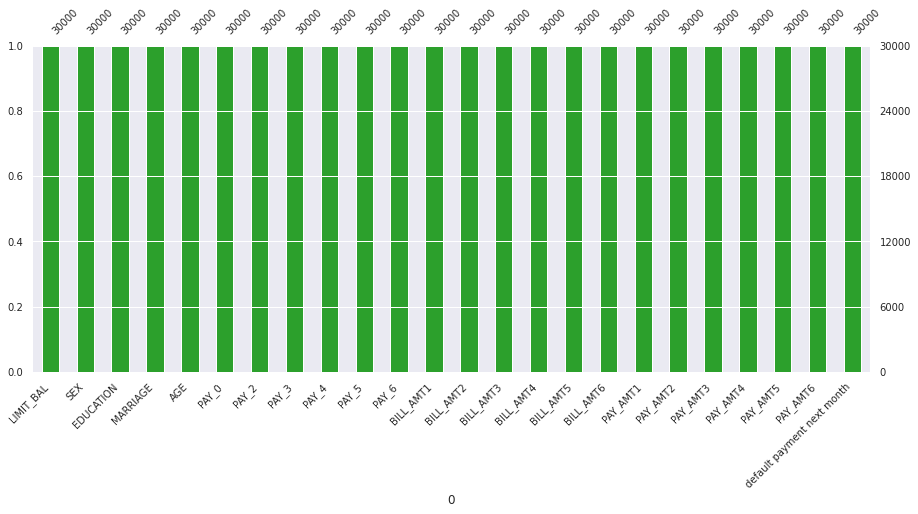

In [ ]:
# Looking into missing values of credit_data
sns.set_theme(style="darkgrid")
miss_val.bar(credit_data,figsize=(15,6),fontsize=10, labels=None,color="tab:green")

* <b> There is no missing values in the dataset

# <b> Descriptive Analytics - Exploratory Data Analysis

---


## <b> - Univariate Analysis


> <b> This Univariate Analysis involves analysing the nature of all variables/features more specifically.



In [ ]:
credit_data.rename(columns={'PAY_0':'PAY_1','default payment next month':'DEF_PAY_NMO','MARRIAGE':'MARITAL_STATUS'},inplace = True)
credit_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object', name=0)

### <b> Limit Balance

> Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit



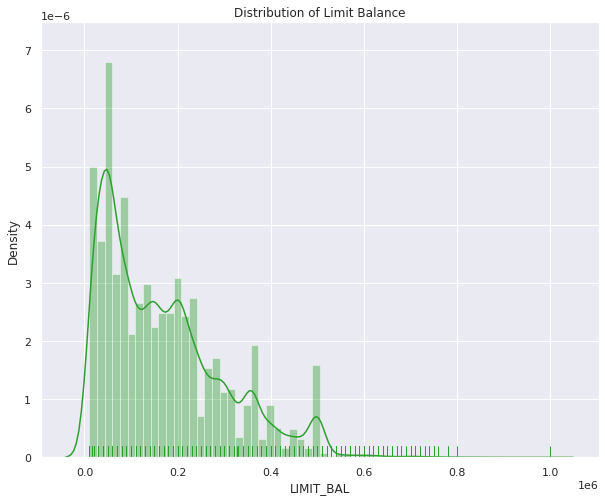

In [ ]:
# Looking into the nature of Limit Balance
fig = plt.subplots(figsize = (10,8))
sns.set_theme(style="darkgrid")
plt.title("Distribution of Limit Balance")
sns.distplot(credit_data.LIMIT_BAL,kde=True,bins=60,hist=True,rug=True,color='tab:green')

### <b> Sex



> Gender (1 = male; 2 = female)




In [ ]:
# Changing values like 1 to male and 2 to female
credit_data.SEX = credit_data.SEX.replace({1:'M',2:'F'})

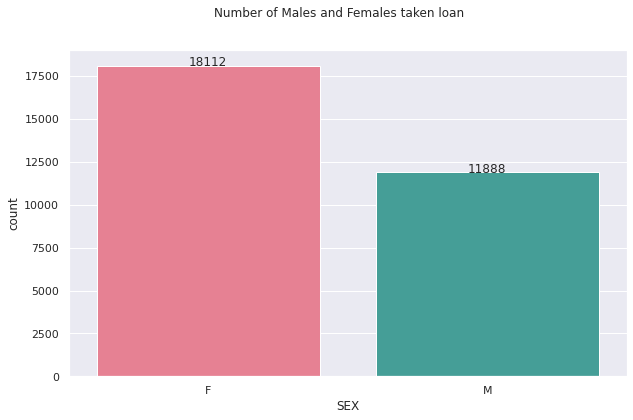

In [ ]:
# Looking into the nature of sex variable
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
Sex = credit_data.SEX
fig.suptitle('Number of Males and Females taken loan', fontsize=12)
ax = sns.countplot(Sex,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

### <b> Education

> Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)



In [ ]:
# Changing values like 5 and 6 to 0
credit_data.EDUCATION = credit_data.EDUCATION.replace({0:'Others',1:'GS',2:'Uni',3:'HS',4:'Others',5:'Others', 6:'Others'})

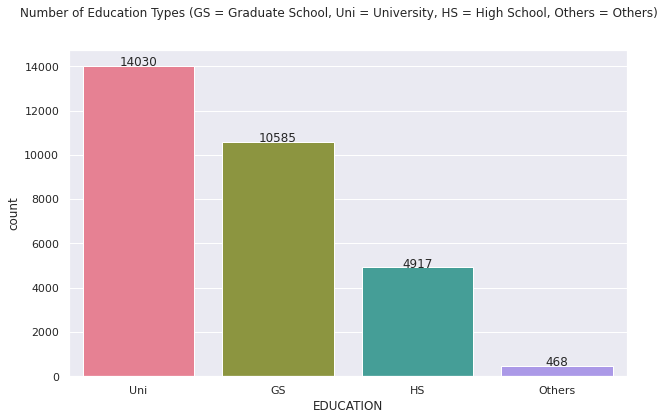

In [ ]:
# Looking into the nature of Education variable
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
Edu = credit_data.EDUCATION
fig.suptitle('Number of Education Types (GS = Graduate School, Uni = University, HS = High School, Others = Others)', fontsize=12)
ax = sns.countplot(Edu,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

### <b> Marital Status

> Marital status (1 = married; 2 = single; 3 = others)






In [ ]:
# Changing values like 0 to others
credit_data.MARITAL_STATUS = credit_data.MARITAL_STATUS.replace({1:'M',2:'S',3:'O',0:'O'})

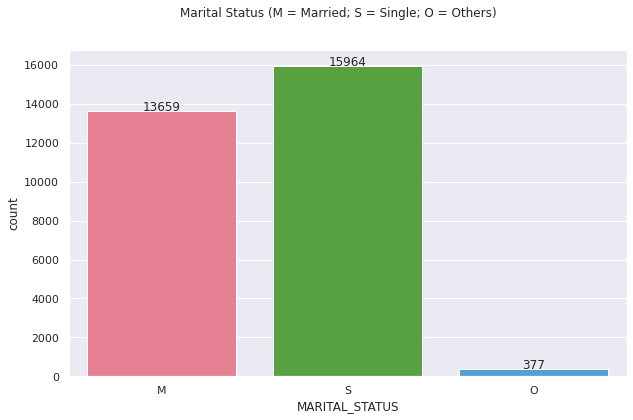

In [ ]:
# Looking into the nature of Education variable
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
Marr = credit_data.MARITAL_STATUS
fig.suptitle('Marital Status (M = Married; S = Single; O = Others)', fontsize=12)
ax = sns.countplot(Marr,palette = "husl")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center") 

### <b> Age

> Age (year)



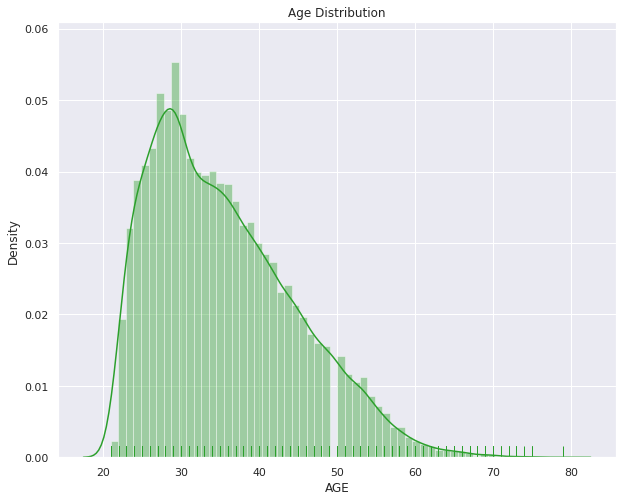

In [ ]:
# Looking into the nature of Age Variable
fig = plt.subplots(figsize = (10,8))
sns.set_theme(style="darkgrid")
plt.title("Age Distribution")
sns.distplot(credit_data.AGE,kde=True,color='tab:green',hist=True,bins=60,rug=True)

### <b> Default Payment Next Month

> Default Payment (Yes = 1, No = 0), as the response variable.



In [ ]:
# Changing values like 1 to Def and 2 to No Def
credit_data.DEF_PAY_NMO = credit_data.DEF_PAY_NMO.replace({0:'No_Def',1:'Def'})

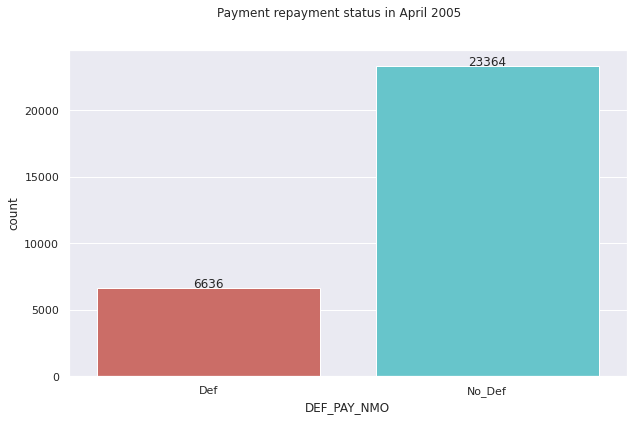

In [ ]:
# Looking into the nature of Default Payment Next Month
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
Def = credit_data.DEF_PAY_NMO
fig.suptitle('Payment repayment status in April 2005', fontsize=12)
ax = sns.countplot(Def,palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

## <b> - Multivariate Analysis

> Multivariate Analysis involves analysis multiple variable under various circumstances



### <b> - Default Rate

> This research employed a binary variable, default payment as the response variable



#### <b> Gender/Sex

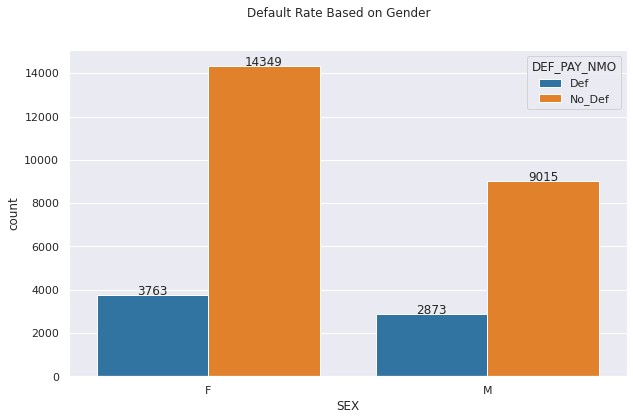

In [ ]:
# Looking into Default rate based on gender
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Gender', fontsize=12)
ax = sns.countplot(data=credit_data,x='SEX',hue='DEF_PAY_NMO',palette = "tab10")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Education

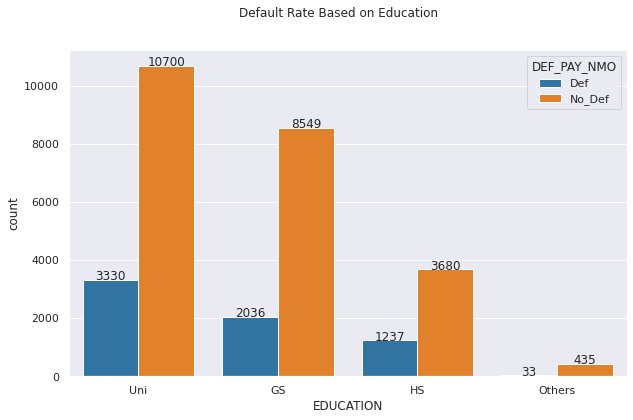

In [ ]:
# Looking into Default rate based on Education
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Education', fontsize=12)
ax = sns.countplot(data=credit_data,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Marital Status

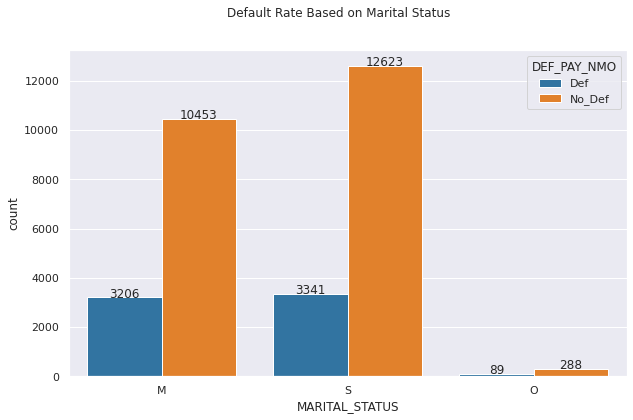

In [ ]:
# Looking into Default rate based on Marriage
fig,ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Marital Status', fontsize=12)
ax = sns.countplot(data=credit_data,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Age

In [ ]:
# Classifiying Age into three categories as Youngster, Middle Aged and Elders.
youngers = credit_data[credit_data.AGE <= 40]
middle_aged = credit_data[(credit_data.AGE > 40) & (credit_data.AGE <=60)]
elders = credit_data[credit_data.AGE >60]

##### <b> Young Age

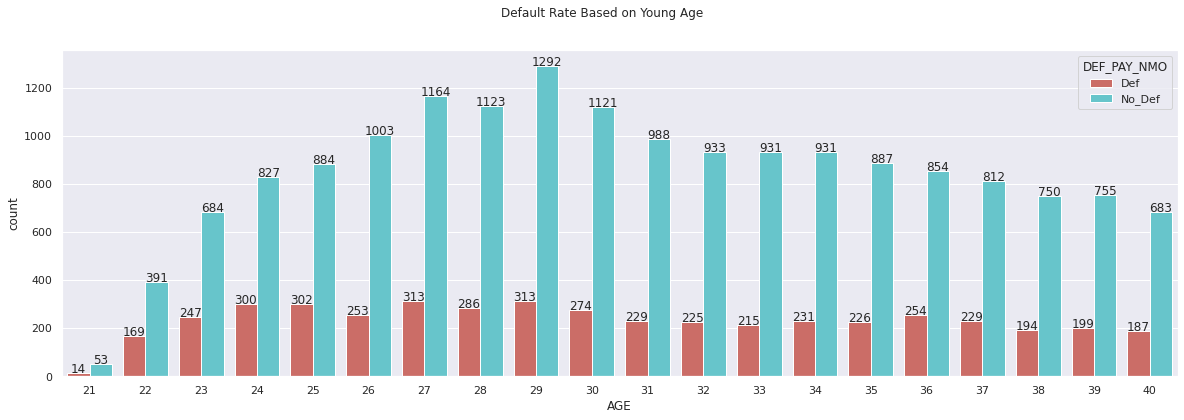

In [ ]:
# Looking into Default rate based on Young Age
fig,ax = plt.subplots(figsize = (20,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Young Age', fontsize=12)
ax = sns.countplot(data=youngers,x='AGE',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Young Age with gender distinction

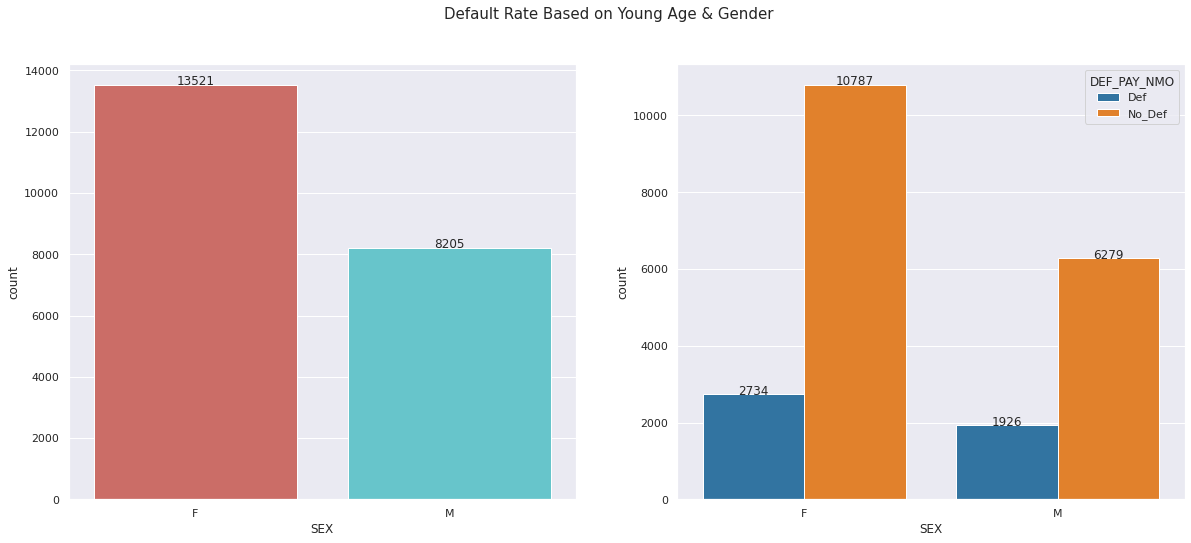

In [ ]:
# Looking into Default rate based on Young Age and also based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Young Age & Gender', fontsize=15)
sns.countplot(data=youngers, x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=youngers,x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Young Age with Education Distinction

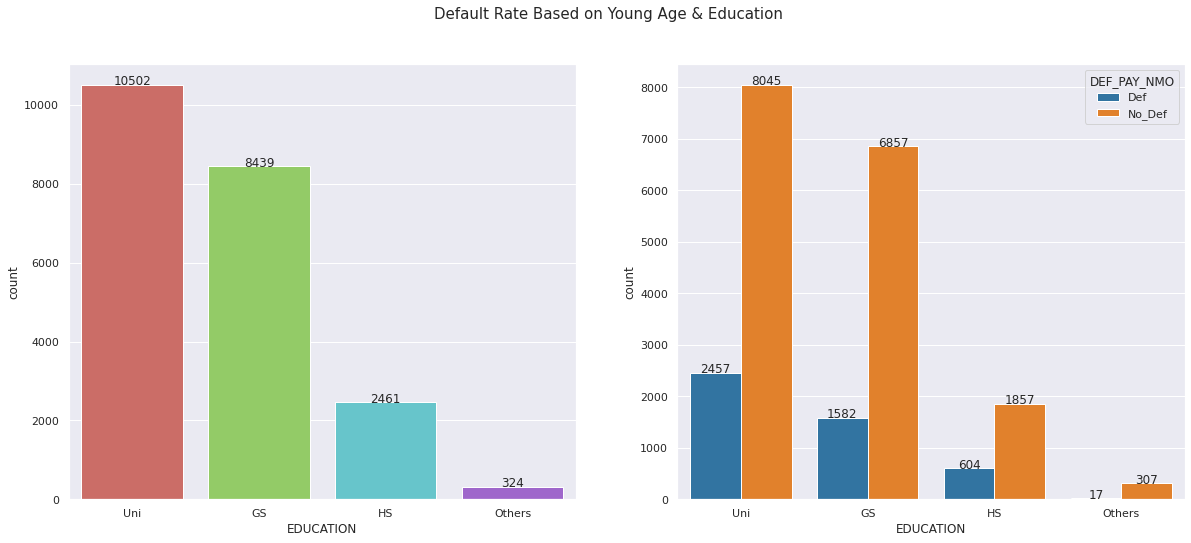

In [ ]:
# Looking into Default rate based on Young Age and also based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Young Age & Education', fontsize=15)
sns.countplot(data=youngers, x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=youngers,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Young age with Marital Status as distinction

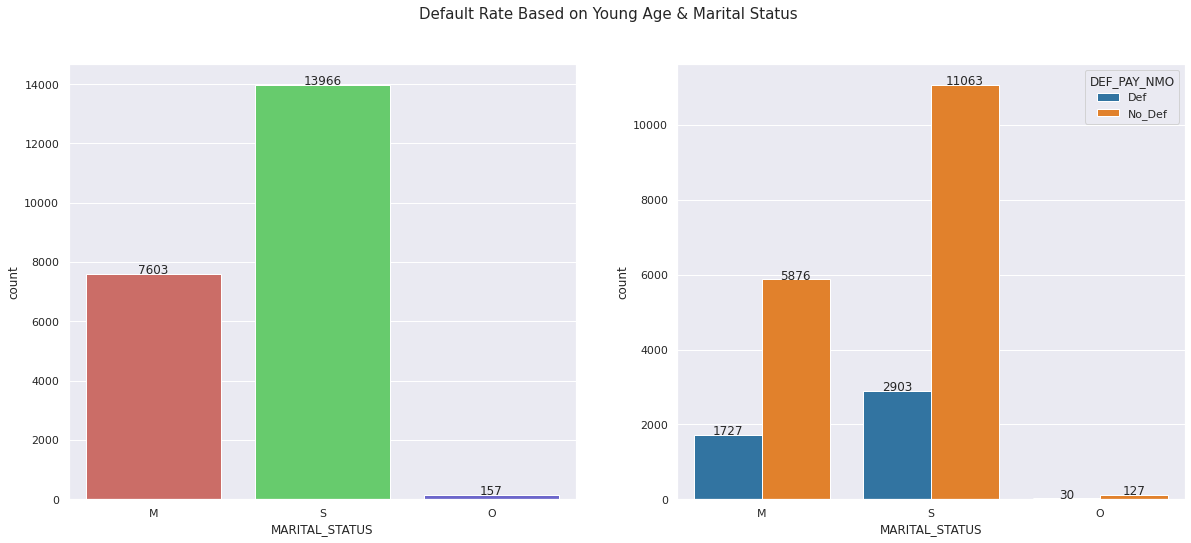

In [ ]:
# Looking into Default rate based on Young Age and also based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Young Age & Marital Status', fontsize=15)
sns.countplot(data=youngers, x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=youngers,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Middle Aged

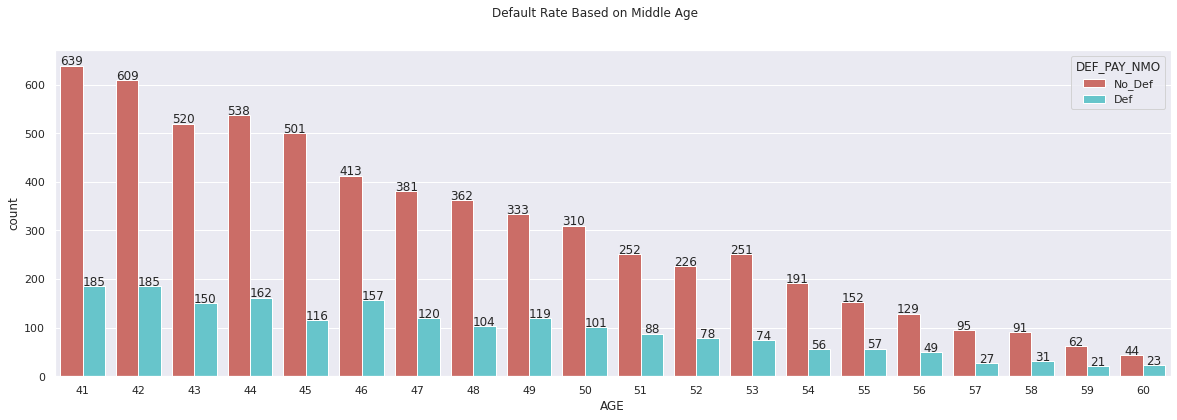

In [ ]:
# Looking into Default rate based on Middle Age
fig,ax = plt.subplots(figsize = (20,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Middle Age', fontsize=12)
ax = sns.countplot(data=middle_aged,x='AGE',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Middle Age based on Gender Distinction

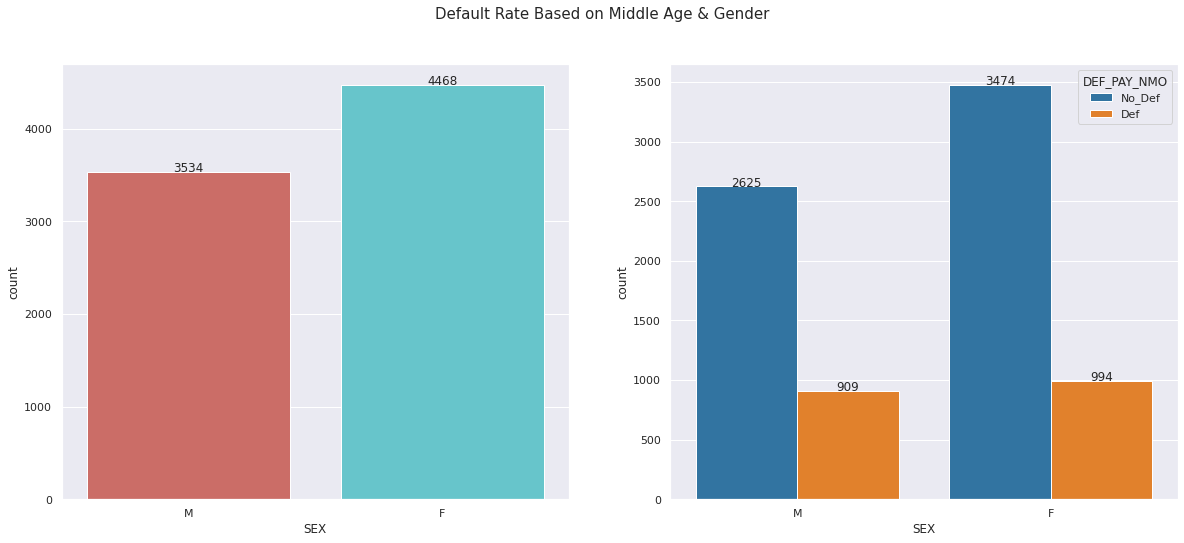

In [ ]:
# Looking into Default rate based on Young Age and also based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Middle Age & Gender', fontsize=15)
sns.countplot(data=middle_aged, x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=middle_aged,x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Middle Age based on Education Distinction

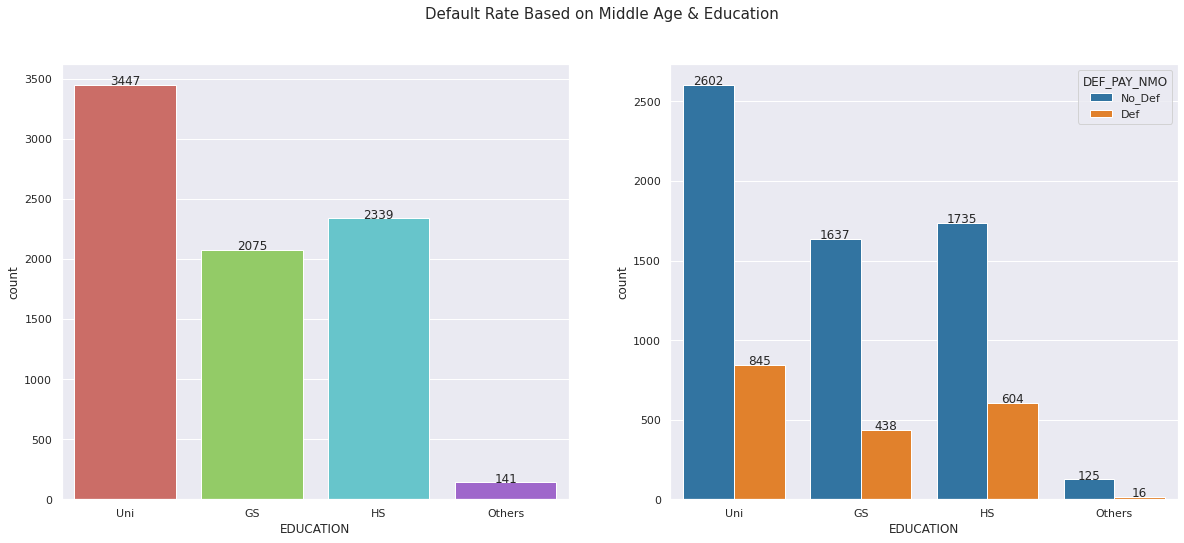

In [ ]:
# Looking into Default rate based on Middle Age and also based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Middle Age & Education', fontsize=15)
sns.countplot(data=middle_aged, x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=middle_aged,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Middle Age based on Marital Status

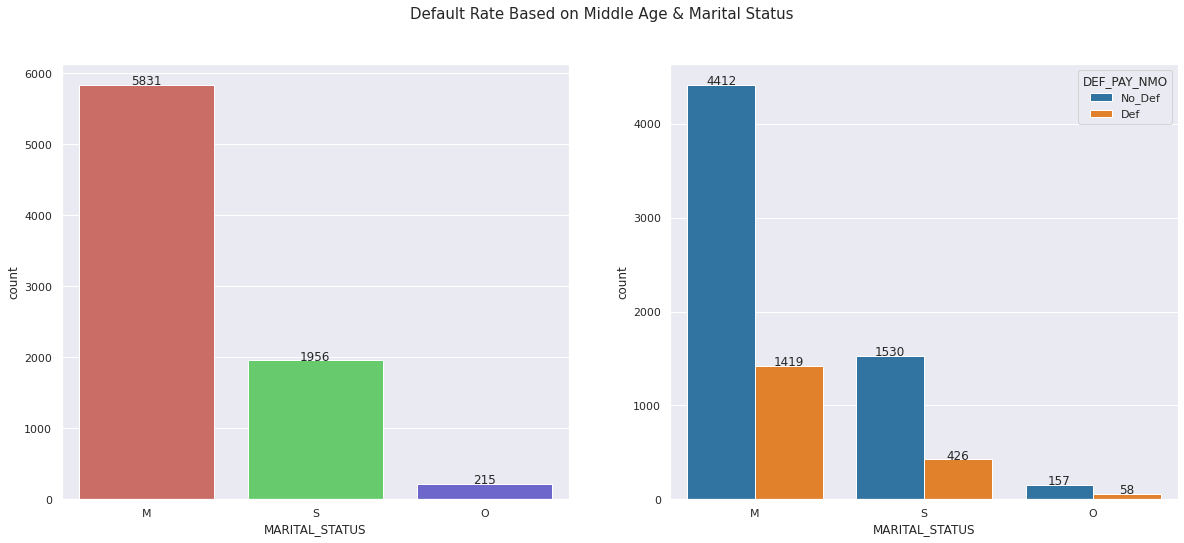

In [ ]:
# Looking into Default rate based on Middle Age and also based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Middle Age & Marital Status', fontsize=15)
sns.countplot(data=middle_aged, x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=middle_aged,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Old Aged

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


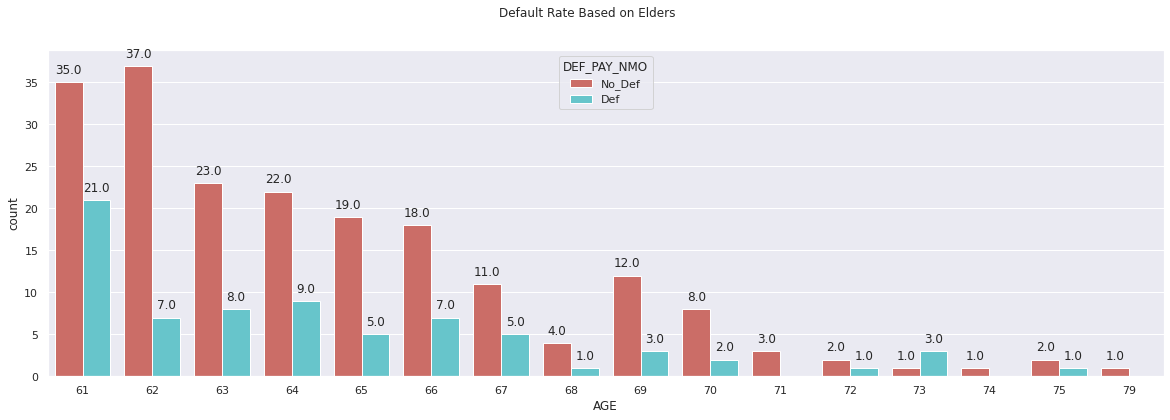

In [ ]:
# Looking into Default rate based on Elders
fig,ax = plt.subplots(figsize = (20,6))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Elders', fontsize=12)
ax = sns.countplot(data=elders,x='AGE',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Old Age based on Gender Distinction

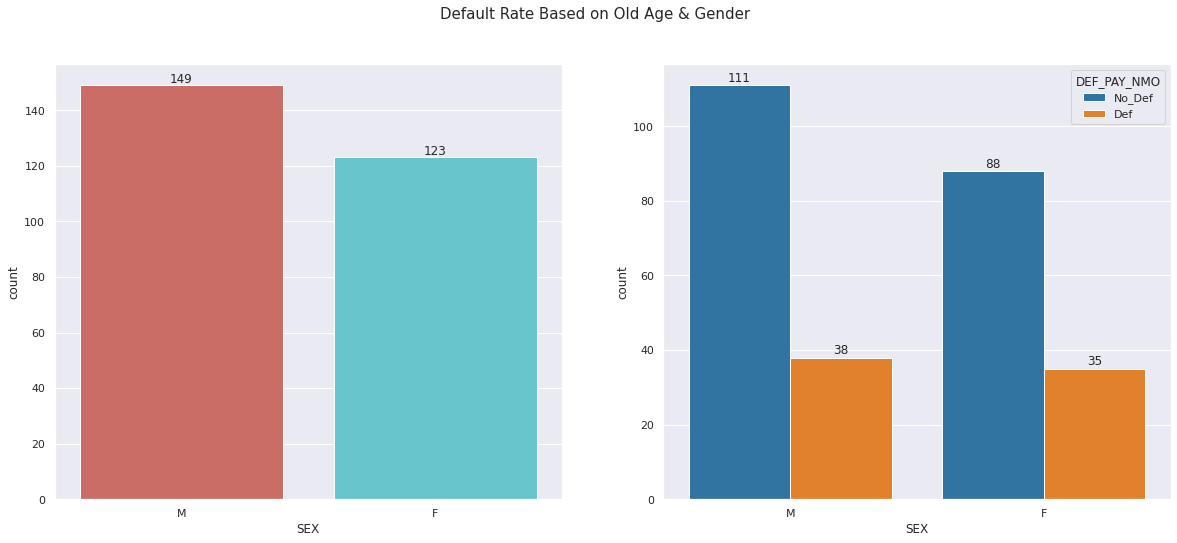

In [ ]:
# Looking into Default rate based on Old Age and also based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Old Age & Gender', fontsize=15)
sns.countplot(data=elders, x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=elders,x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Old Age based on Education Distinction

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


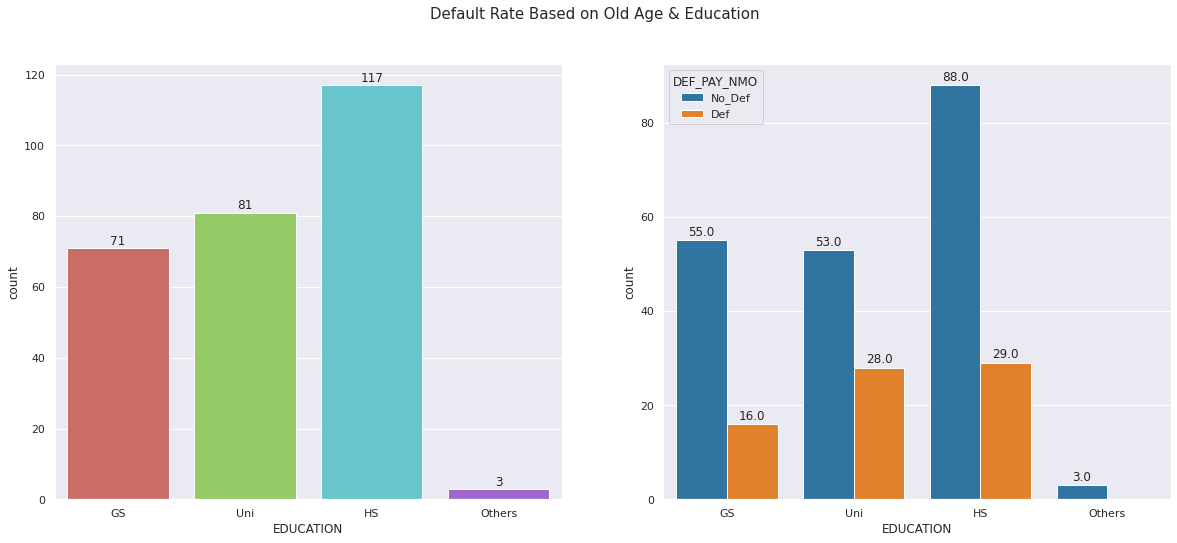

In [ ]:
# Looking into Default rate based on Old Age and also based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Old Age & Education', fontsize=15)
sns.countplot(data=elders, x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=elders,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Old Age based on Marital Status Distinction

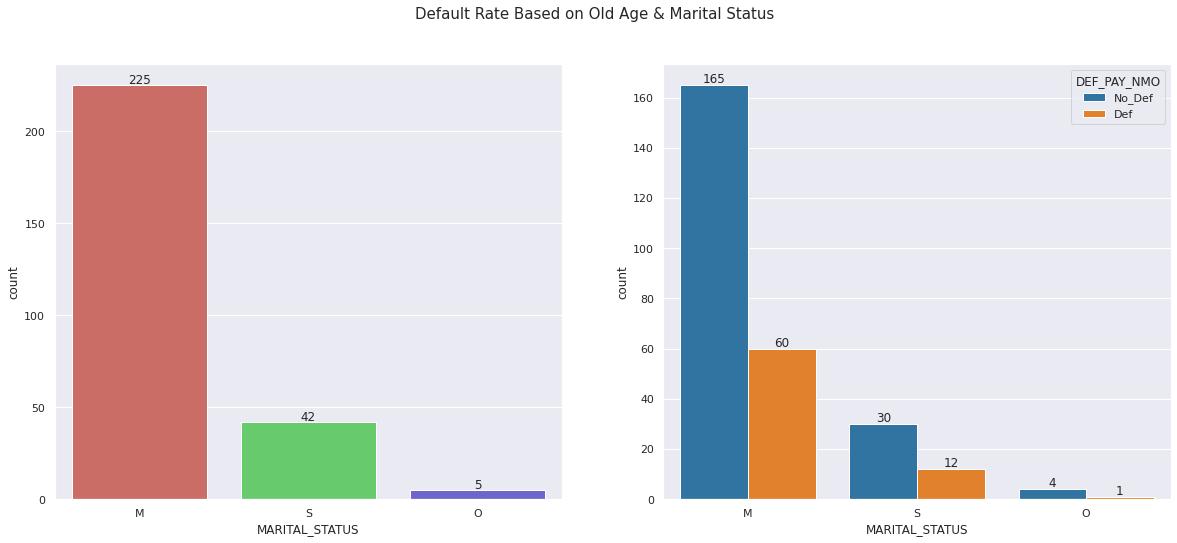

In [ ]:
# Looking into Default rate based on Old Age and also based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Old Age & Marital Status', fontsize=15)
sns.countplot(data=elders, x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=elders,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b> - Limit Balance

> Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.



In [ ]:
# Classifying credit given into three category as Low, Medium and High
low_credit = credit_data[credit_data.LIMIT_BAL <= 250000]
medium_credit = credit_data[(credit_data.LIMIT_BAL > 250000) & (credit_data.LIMIT_BAL <= 500000)]
high_credit = credit_data[credit_data.LIMIT_BAL > 500000]

#### <b> Low credit 

> Customer analysis based on Sex, Education, Marital Status and Default Payment Next Month

> Low Credit range is below $250,000 



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


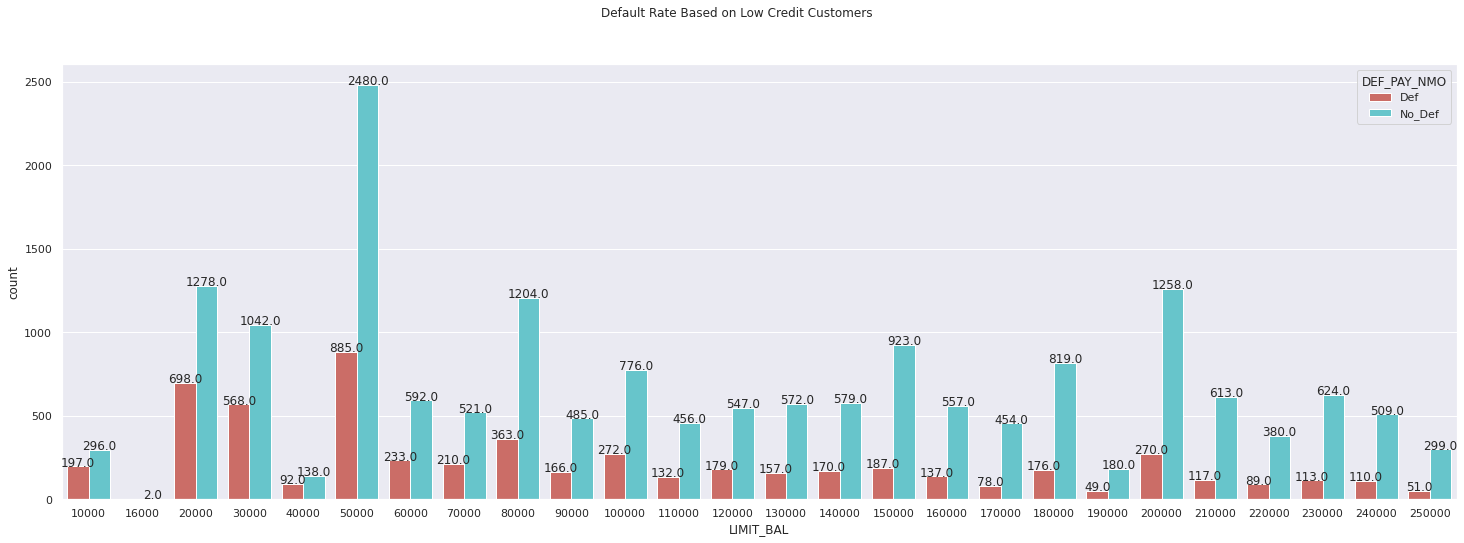

In [ ]:
# Looking into Default rate based on low credit customers
fig,ax = plt.subplots(figsize = (25,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Low Credit Customers', fontsize=12)
ax = sns.countplot(data=low_credit,x='LIMIT_BAL',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on low credit customer based on Sex

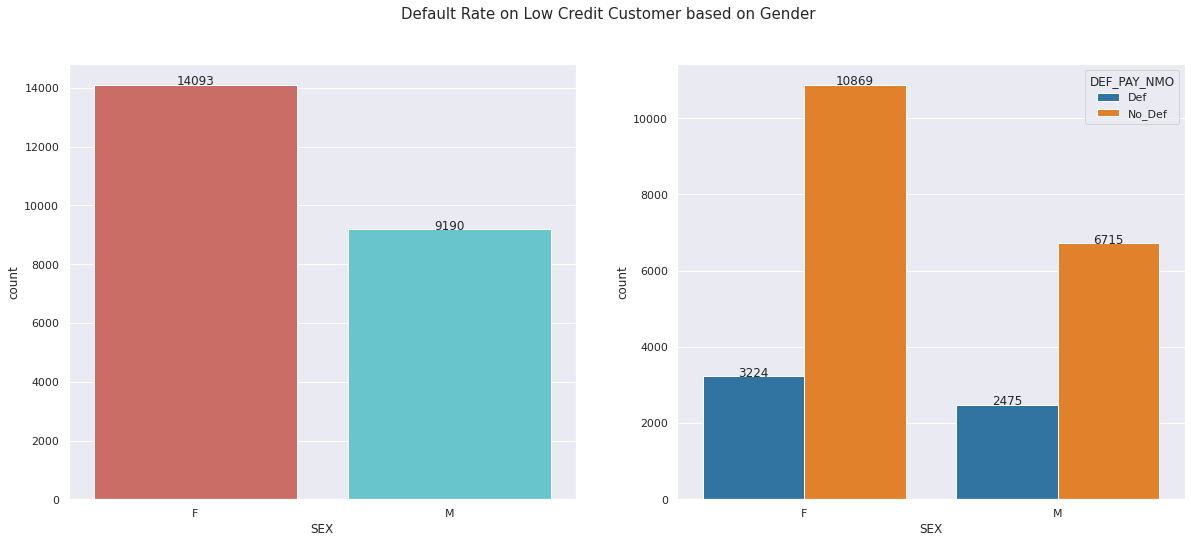

In [ ]:
# Looking into Default rate on low credit customer based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Low Credit Customer based on Gender', fontsize=15)
sns.countplot(data=low_credit,x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=low_credit,x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on low credit customer based on Education

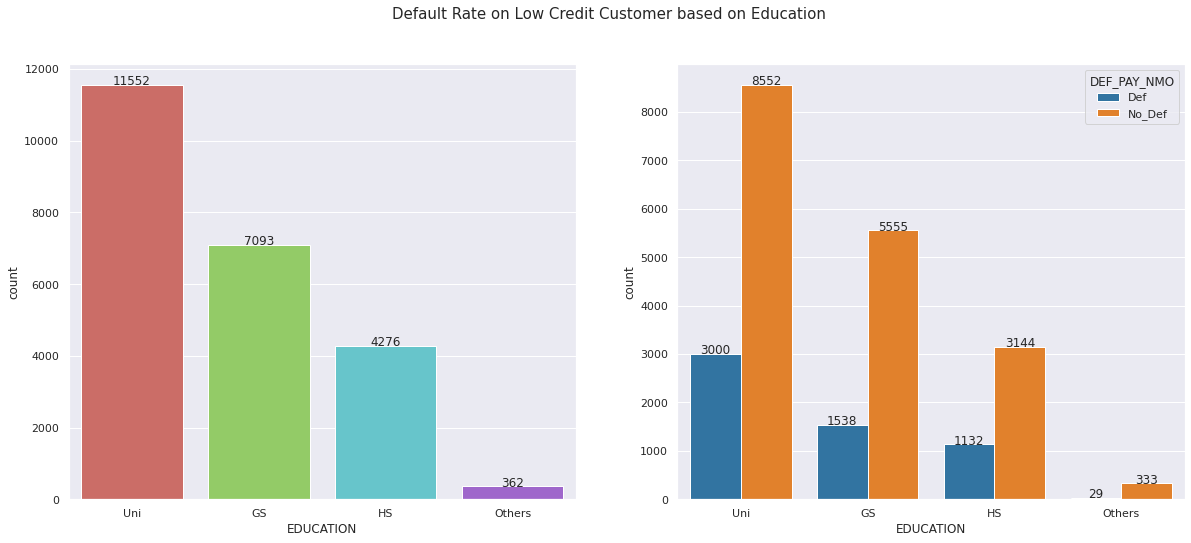

In [ ]:
# Looking into Default rate on low credit customers based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Low Credit Customer based on Education', fontsize=15)
sns.countplot(data=low_credit, x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=low_credit,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on low credit customer based on Marital status

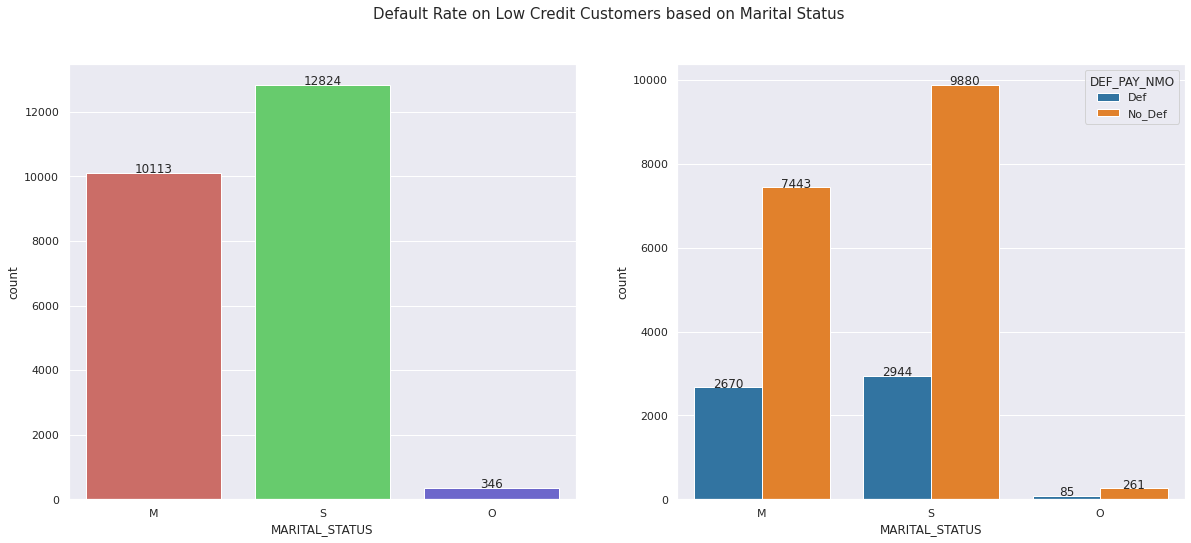

In [ ]:
# Looking into Default rate on Low credit customers based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Low Credit Customers based on Marital Status', fontsize=15)
sns.countplot(data=low_credit, x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=low_credit,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> Medium credit

> Customer analysis based on Sex, Education, Marital Status and Default Payment Next Month


> Medium Credit range is between $(250,000 - 500,000)





posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


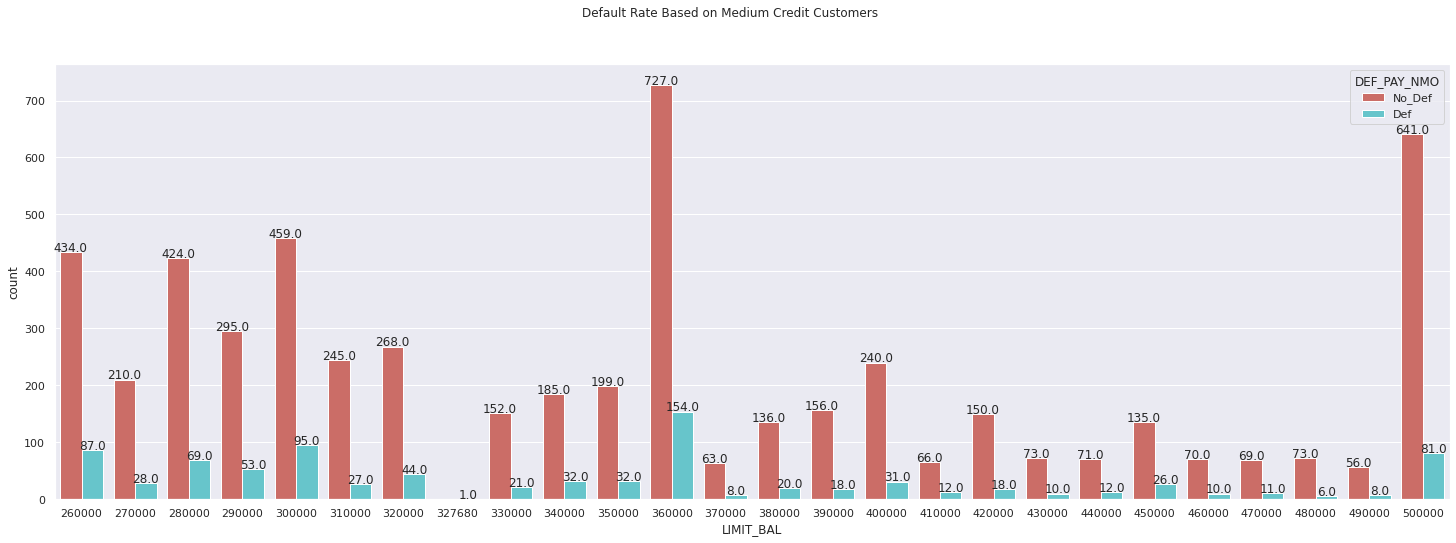

In [ ]:
# Looking into Default rate based on medium credit customers
fig,ax = plt.subplots(figsize = (25,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on Medium Credit Customers', fontsize=12)
ax = sns.countplot(data=medium_credit,x='LIMIT_BAL',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on Medium credit customer based on Sex

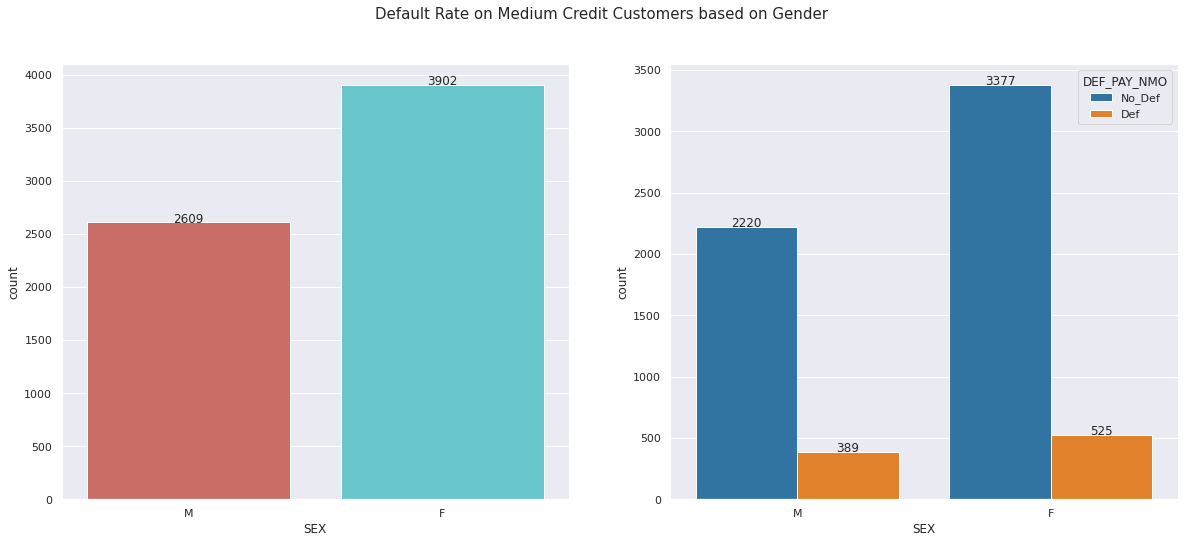

In [ ]:
# Looking into Default rate on medium credit customers based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Medium Credit Customers based on Gender', fontsize=15)
sns.countplot(data=medium_credit, x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=medium_credit, x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on Medium credit customer based on Education

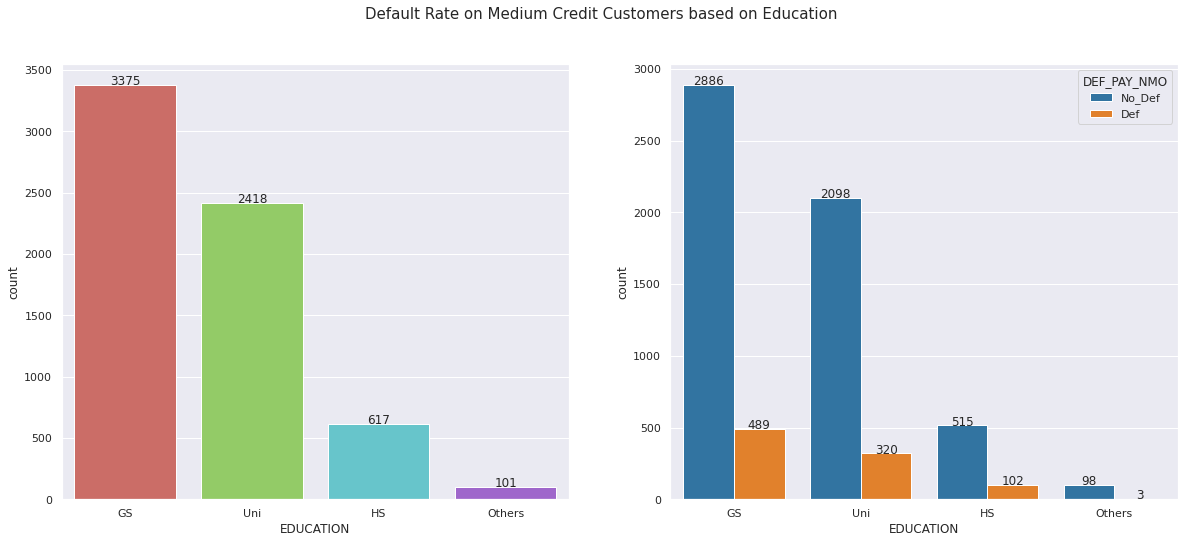

In [ ]:
# Looking into Default rate on Medium credit customers based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Medium Credit Customers based on Education', fontsize=15)
sns.countplot(data=medium_credit, x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=medium_credit,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on Medium credit customer based on Marital status

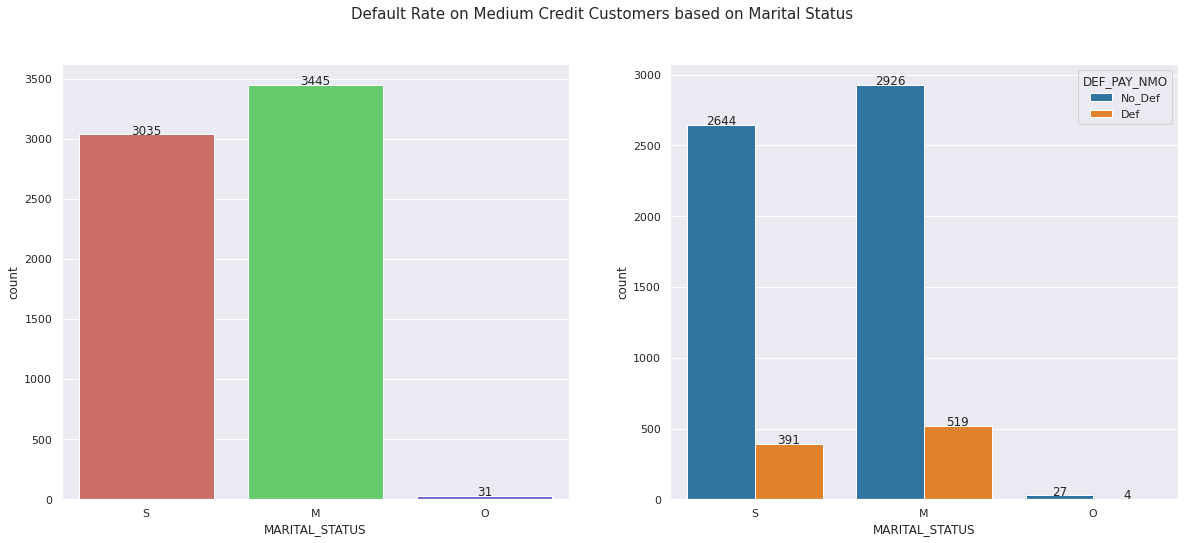

In [ ]:
# Looking into Default rate on Medium credit customers based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on Medium Credit Customers based on Marital Status', fontsize=15)
sns.countplot(data=medium_credit, x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=medium_credit,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

#### <b> High credit 
> Customer analysis based on Sex, Education, Marital Status and Default Payment Next Month

> High Credit range is above $500,000




posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

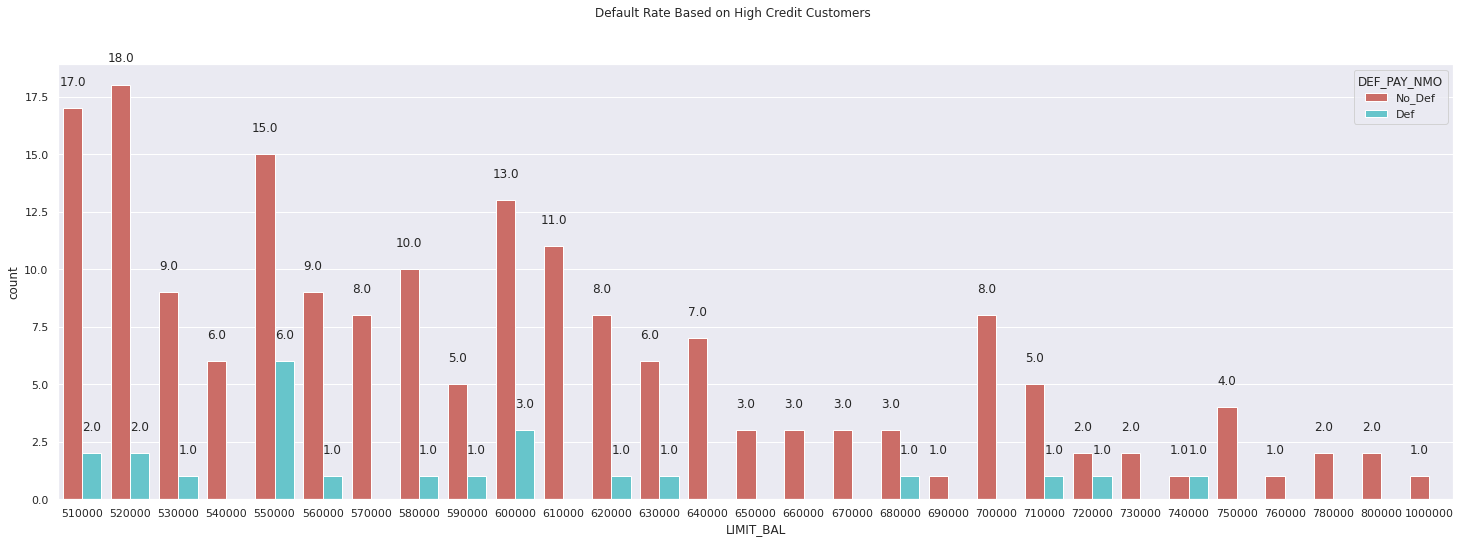

In [ ]:
# Looking into Default rate based on high credit customers
fig,ax = plt.subplots(figsize = (25,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate Based on High Credit Customers', fontsize=12)
ax = sns.countplot(data=high_credit,x='LIMIT_BAL',hue='DEF_PAY_NMO',palette = "hls")
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on High Credit Customer based on Gender

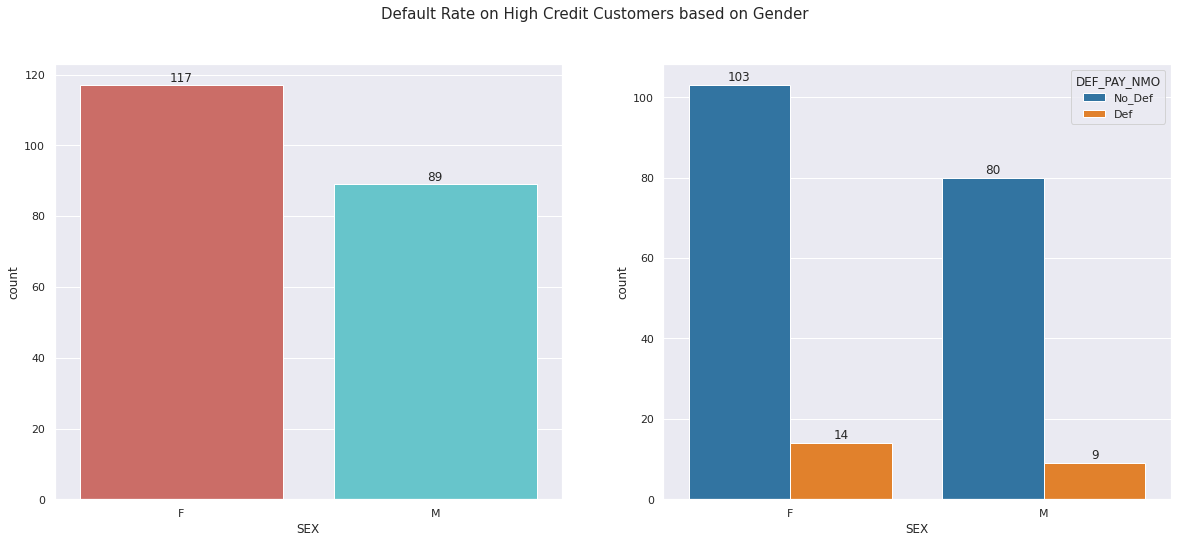

In [ ]:
# Looking into Default rate on High Credit Customers based on Gender
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on High Credit Customers based on Gender', fontsize=15)
sns.countplot(data=high_credit,x='SEX',palette='hls',ax = ax[0])
sns.countplot(data=high_credit,x='SEX',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on High Credit Customer based on Education

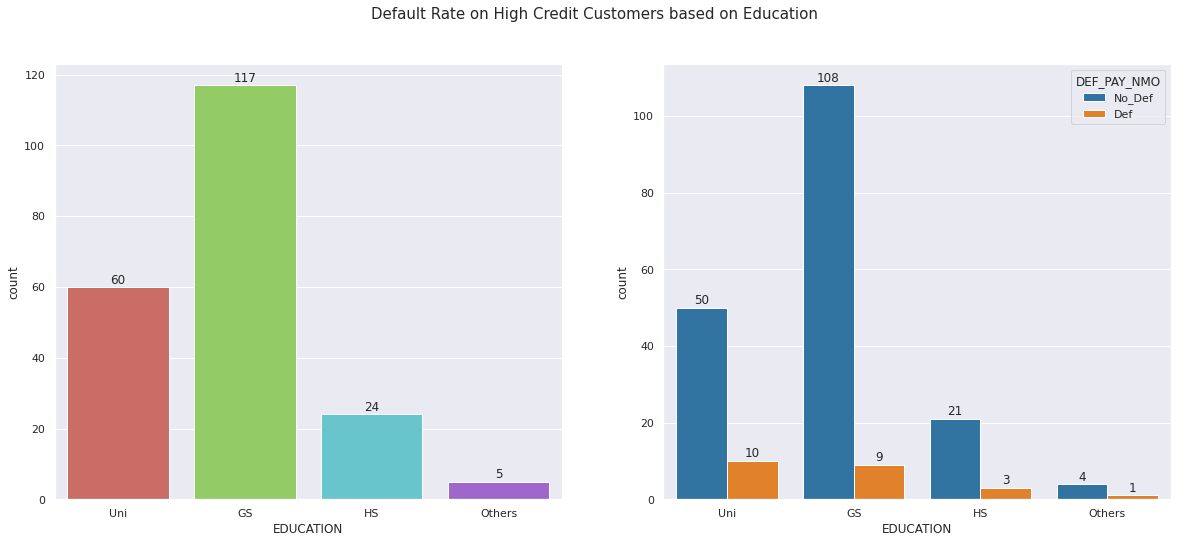

In [ ]:
# Looking into Default rate on High Credit Customers based on Education
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on High Credit Customers based on Education', fontsize=15)
sns.countplot(data=high_credit,x='EDUCATION',palette='hls',ax = ax[0])
sns.countplot(data=high_credit,x='EDUCATION',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

##### <b> Limit Balance on High Credit Customer based on Marital status

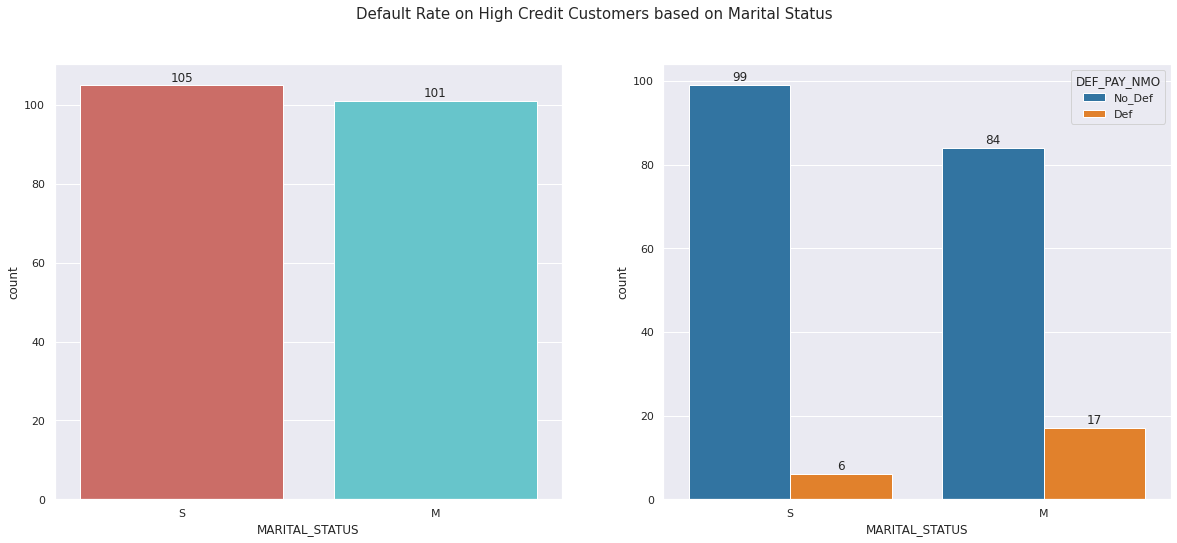

In [ ]:
# Looking into Default rate on High Credit Customers based on Marital Status
fig,ax = plt.subplots(1,2,figsize = (20,8))
sns.set_theme(style="darkgrid")
fig.suptitle('Default Rate on High Credit Customers based on Marital Status', fontsize=15)
sns.countplot(data=high_credit,x='MARITAL_STATUS',palette='hls',ax = ax[0])
sns.countplot(data=high_credit,x='MARITAL_STATUS',hue='DEF_PAY_NMO',palette = "tab10", ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

### <b>- Past Payment

> History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows



#### <b> Pay 1

> The repayment status in September, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



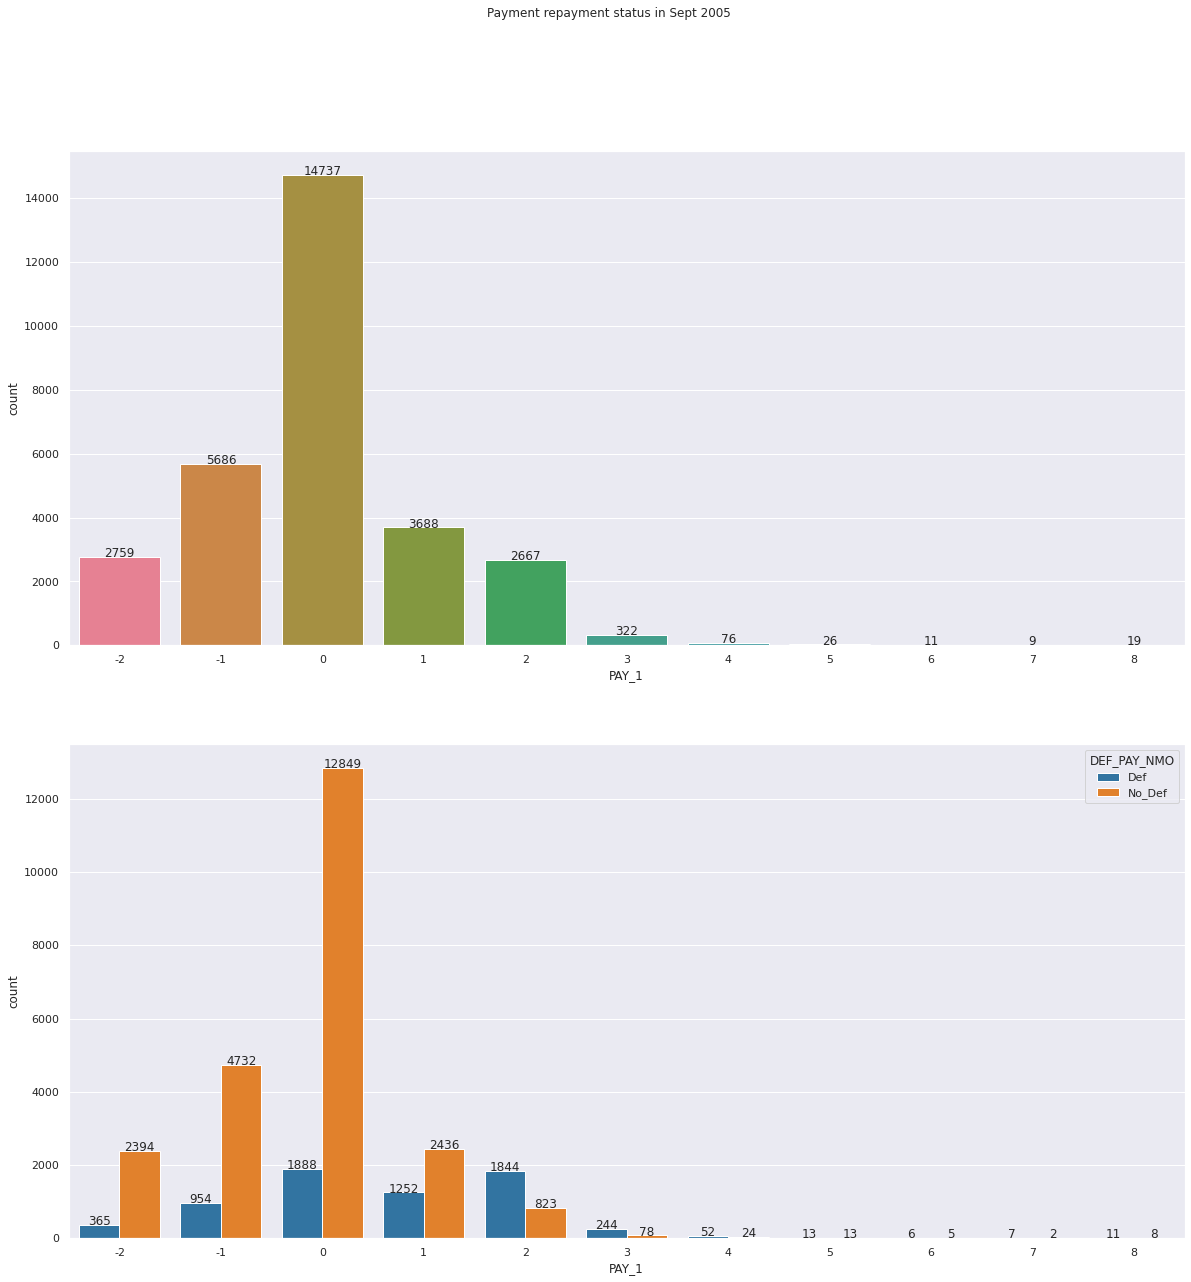

In [ ]:
# Looking into the nature of Pay_1
fig,ax = plt.subplots(2,1,figsize = (20,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Sept 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_1',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_1',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

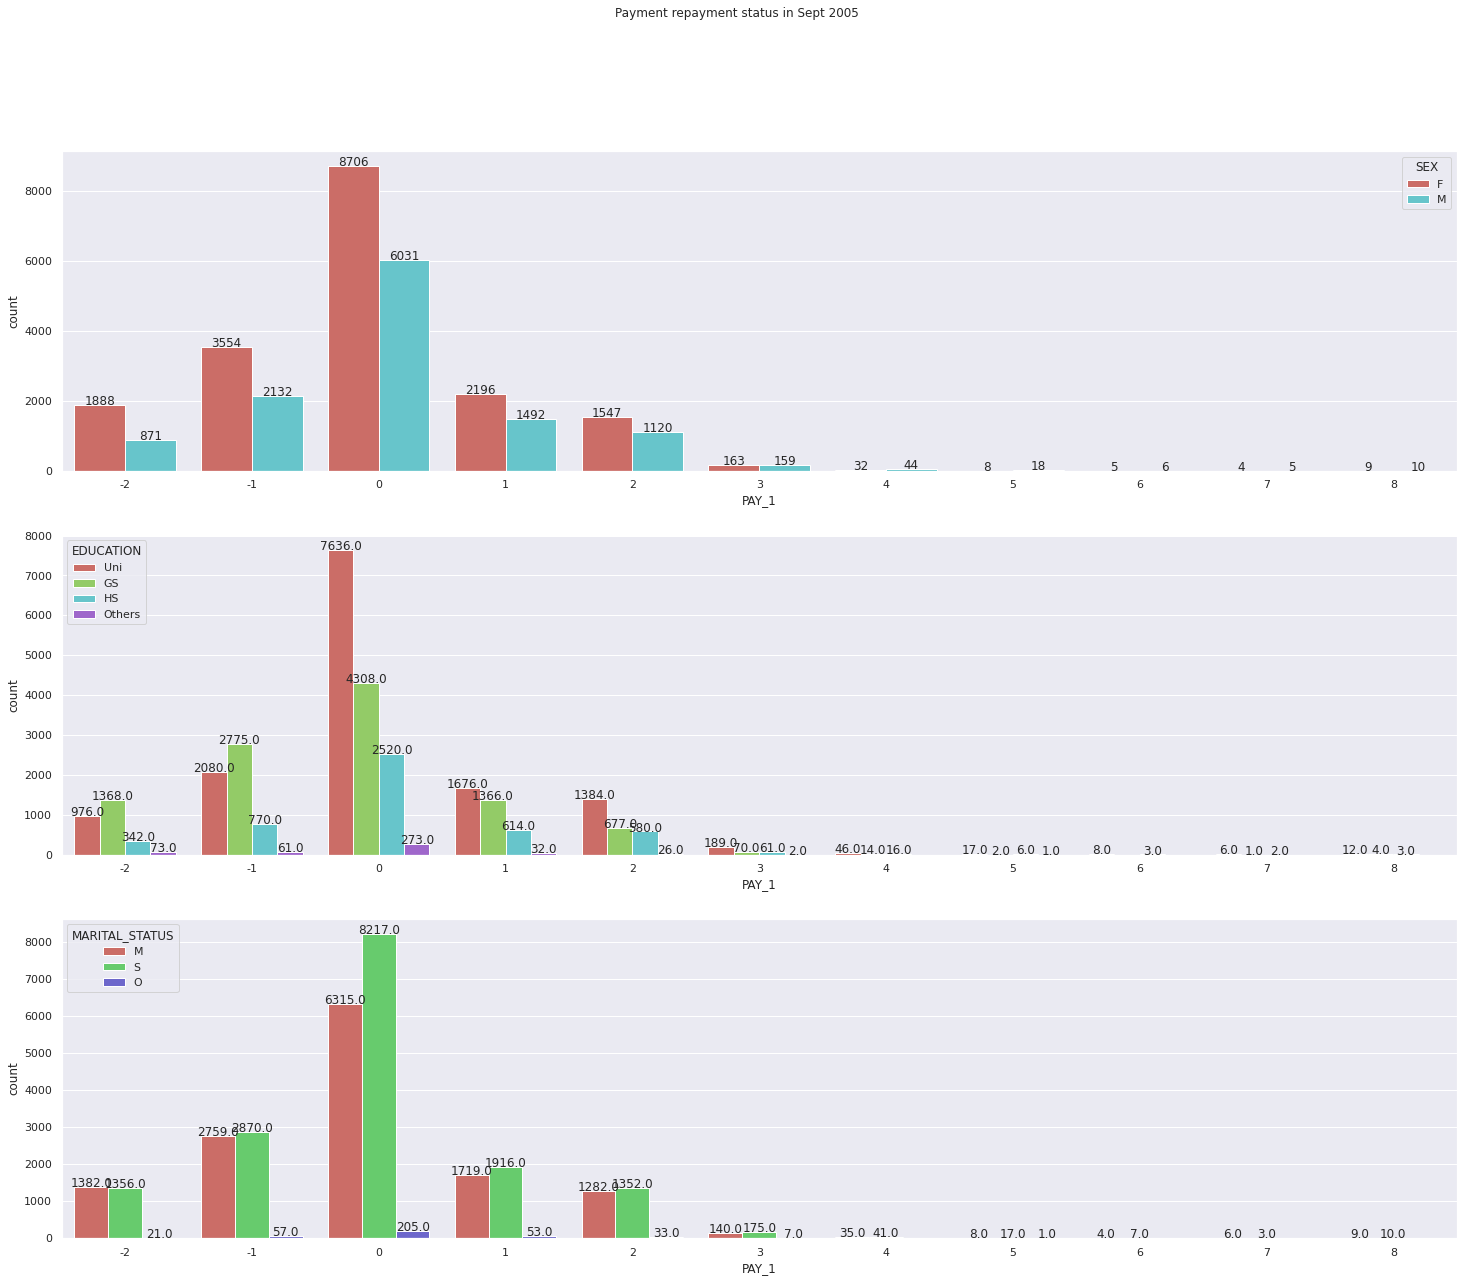

In [ ]:
# Looking into the nature of Pay_1
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Sept 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_1',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_1',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_1',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Pay 2

> The repayment status in August, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


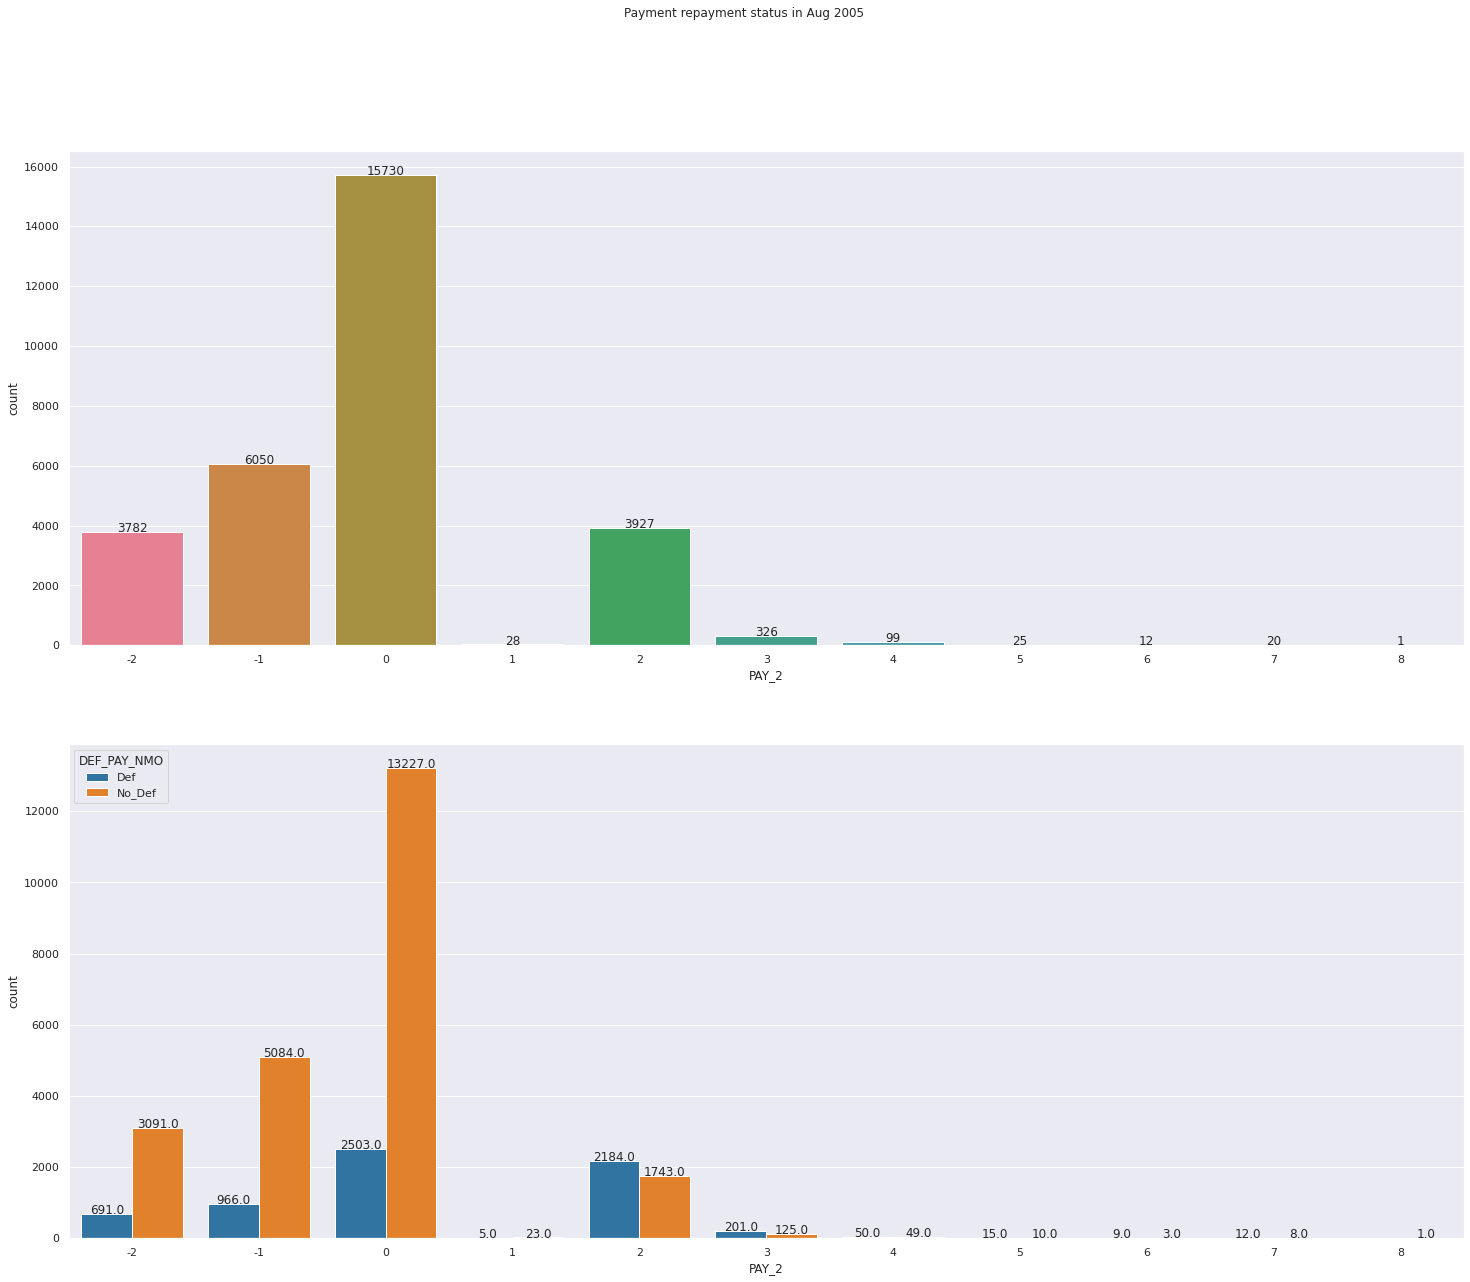

In [ ]:
# Looking into the nature of Pay_2
fig,ax = plt.subplots(2,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Aug 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_2',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_2',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

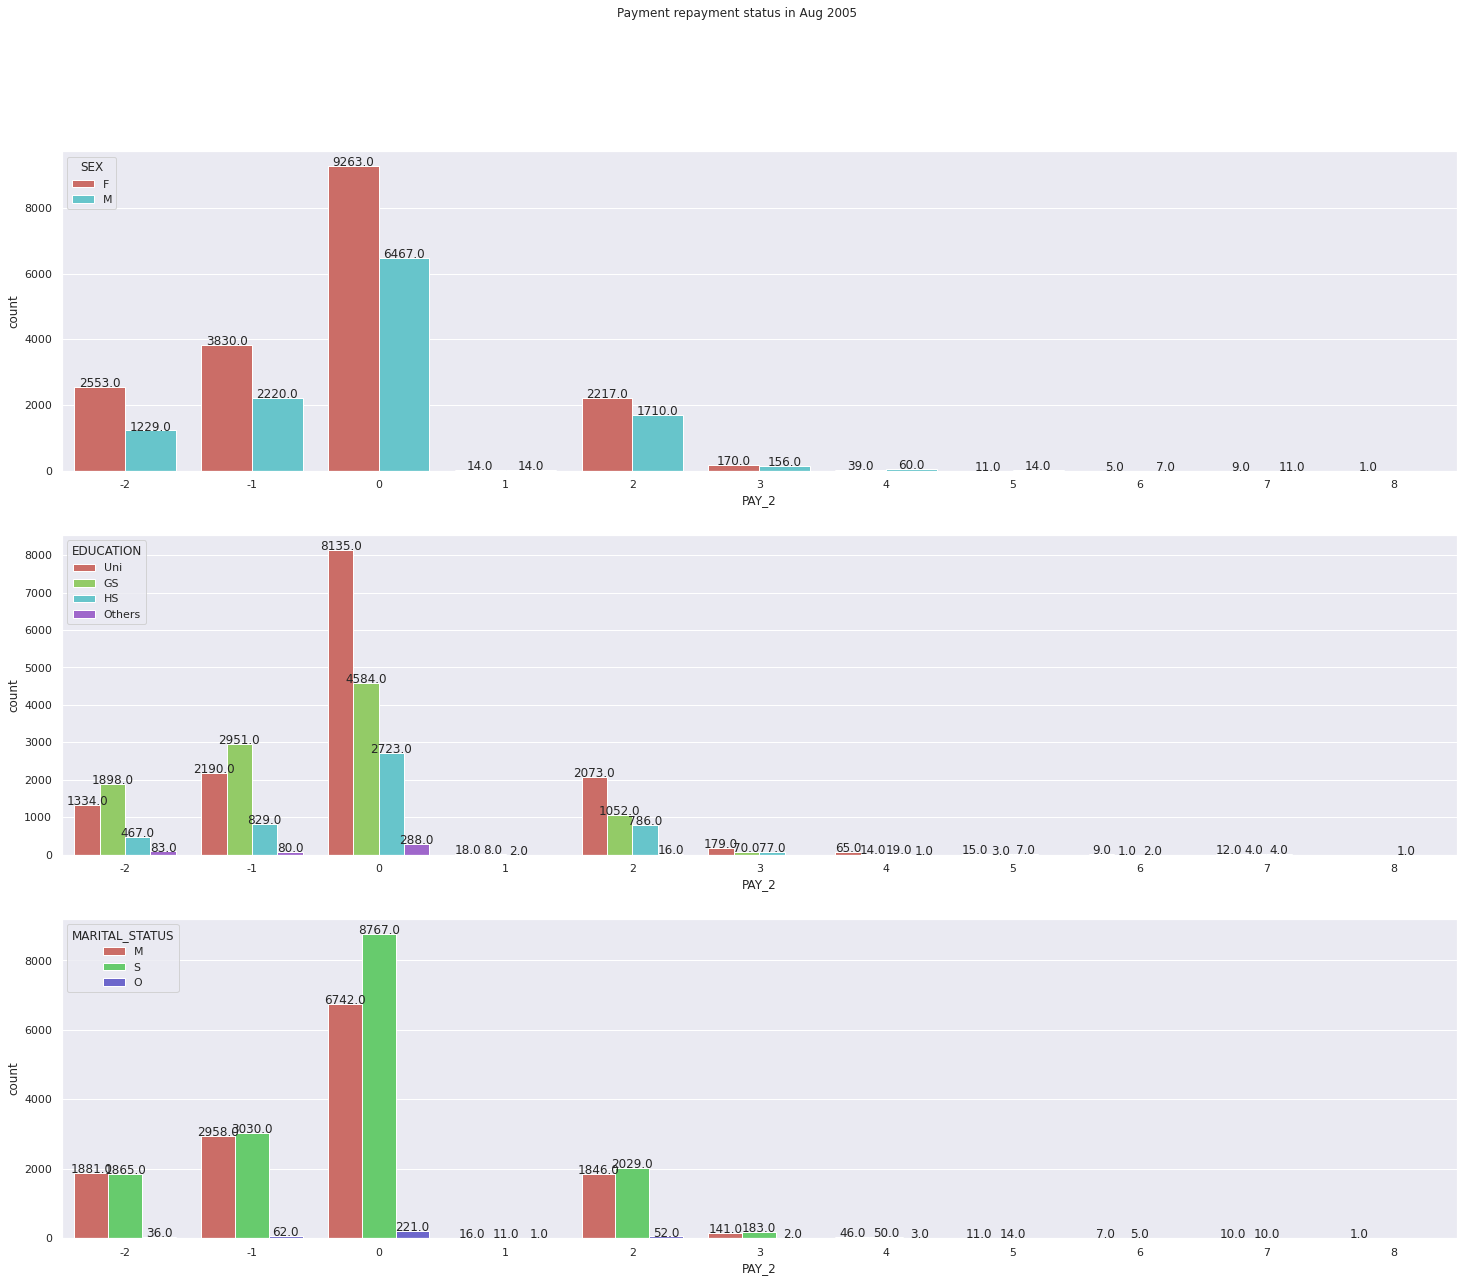

In [ ]:
# Looking into the nature of Pay_2
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Aug 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_2',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_2',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_2',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Pay 3

> The repayment status in July, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



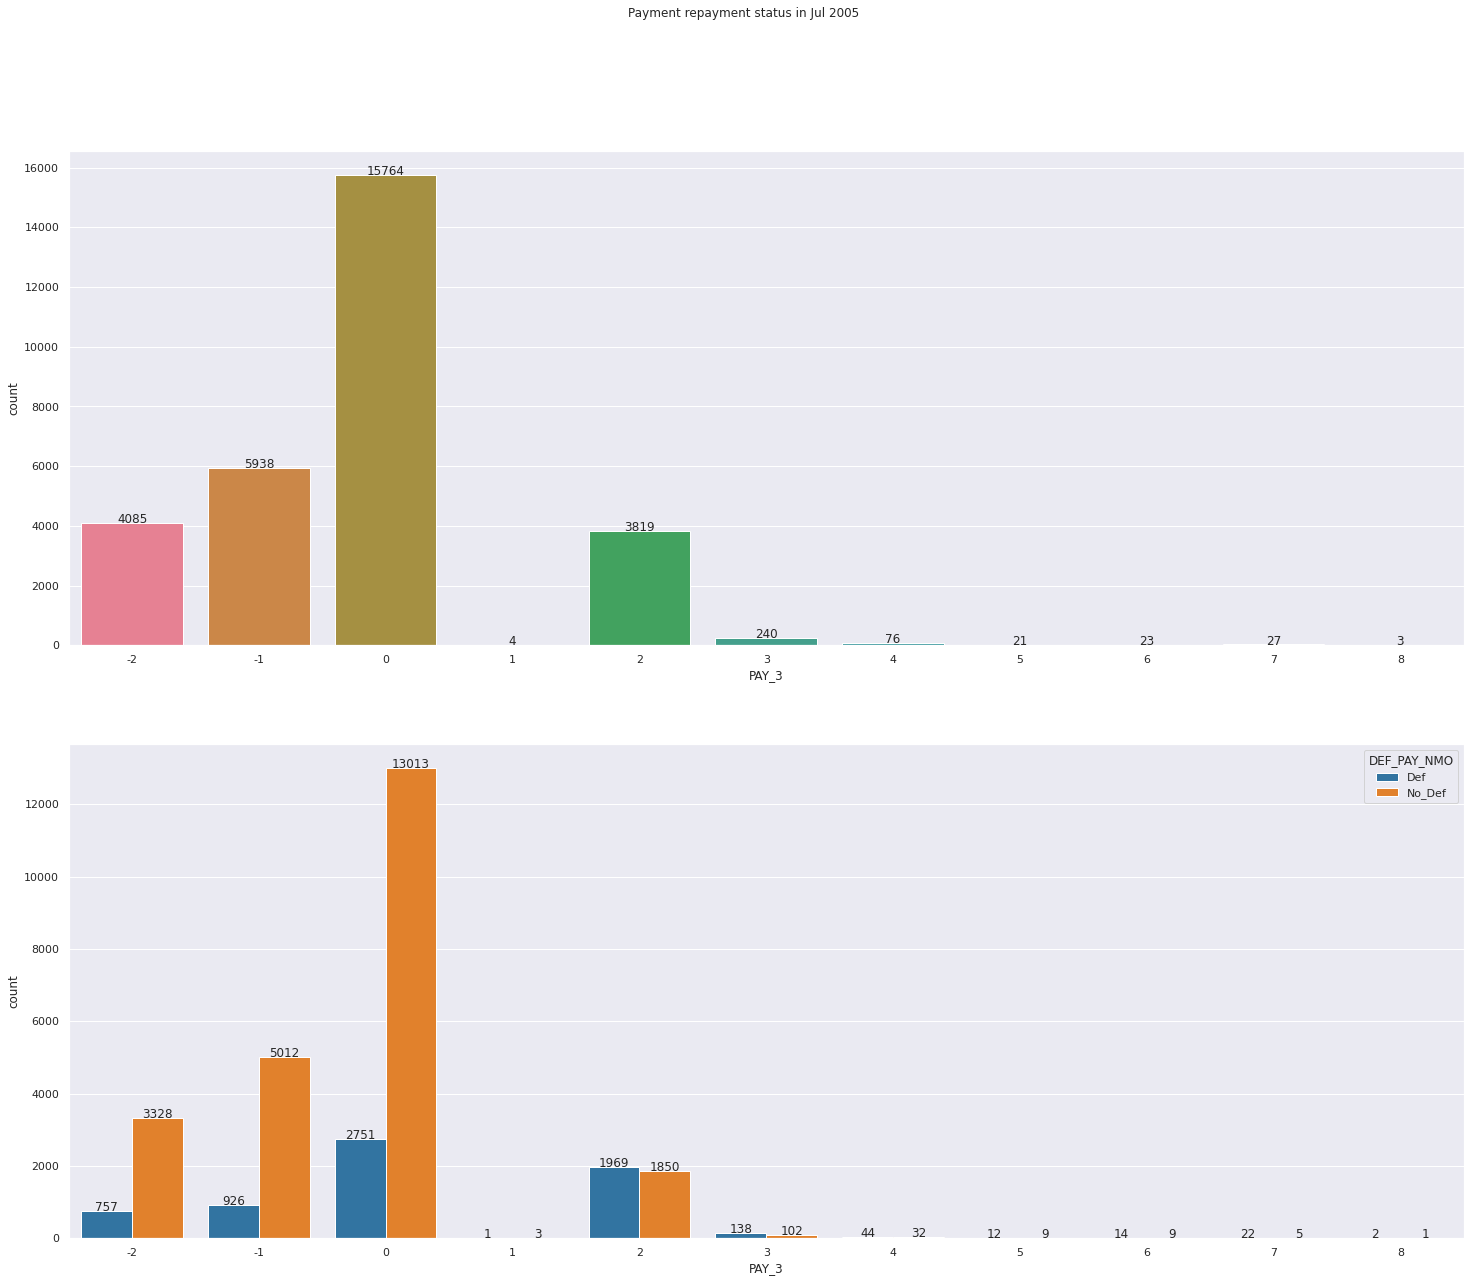

In [ ]:
# Looking into the nature of Pay_3
fig,ax = plt.subplots(2,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Jul 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_3',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_3',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

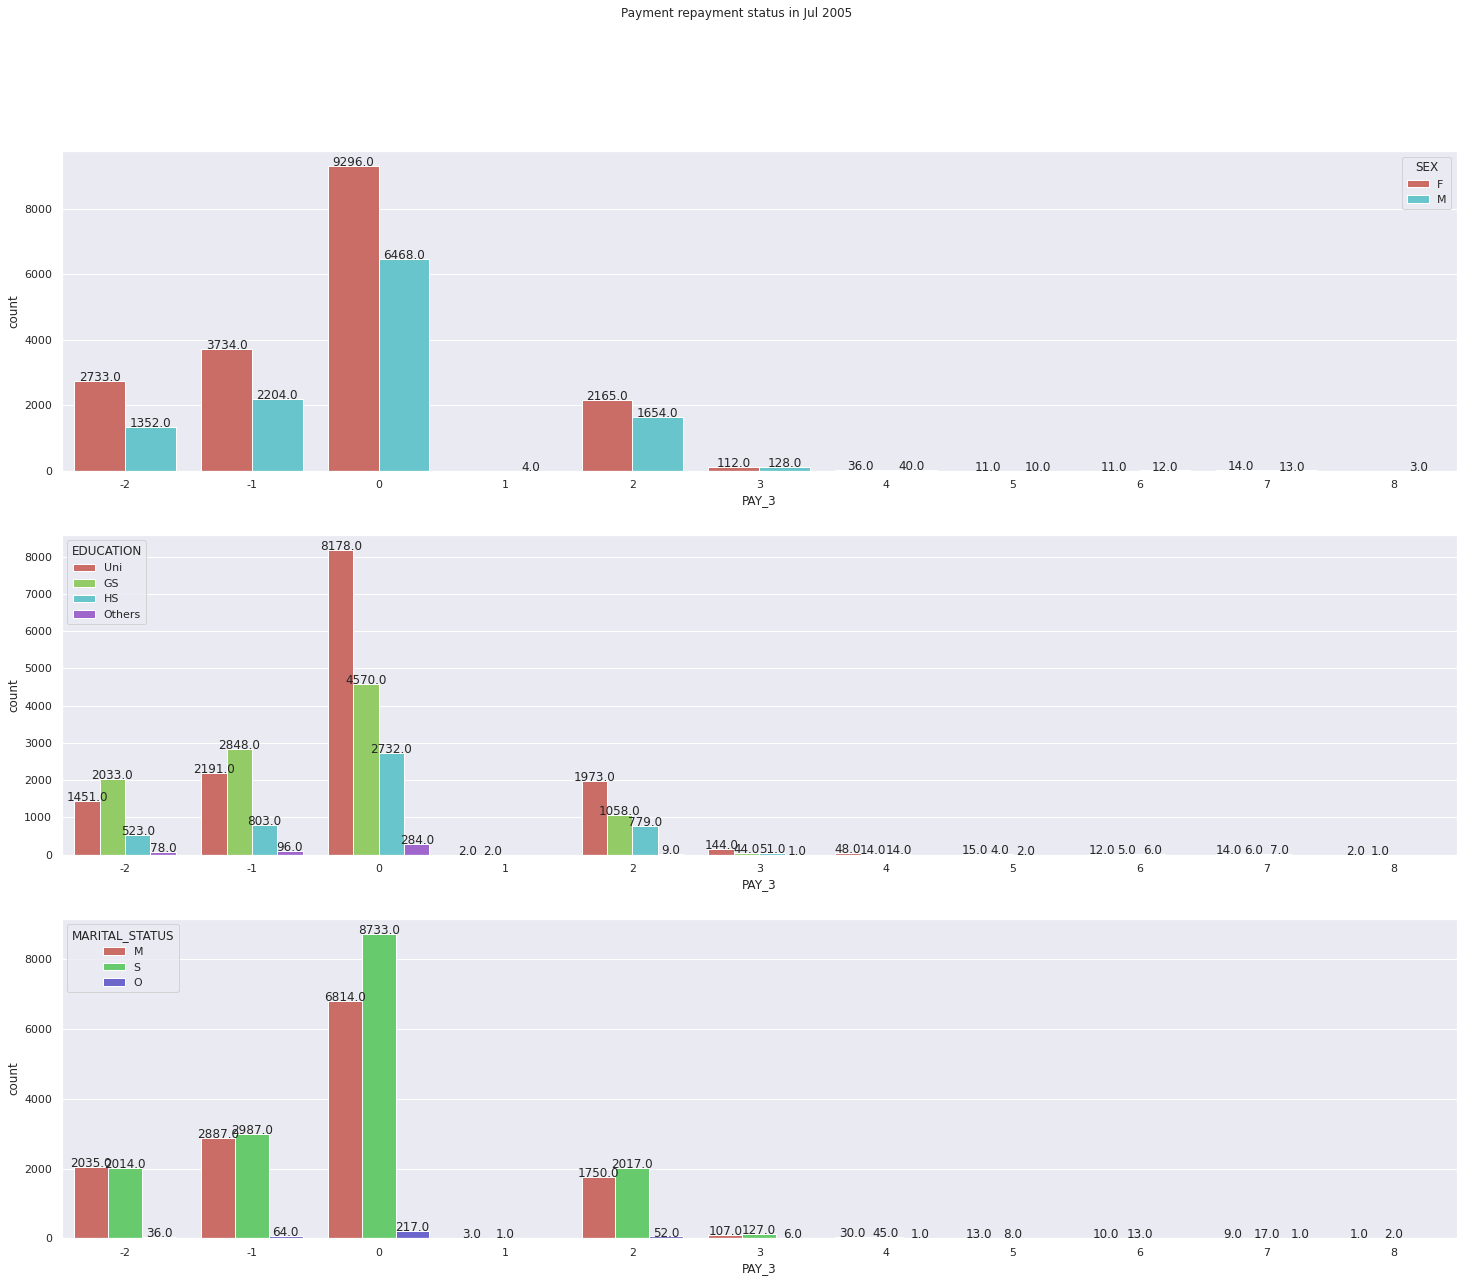

In [ ]:
# Looking into the nature of Pay_3
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Jul 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_3',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_3',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_3',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Pay 4

> The repayment status in June, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



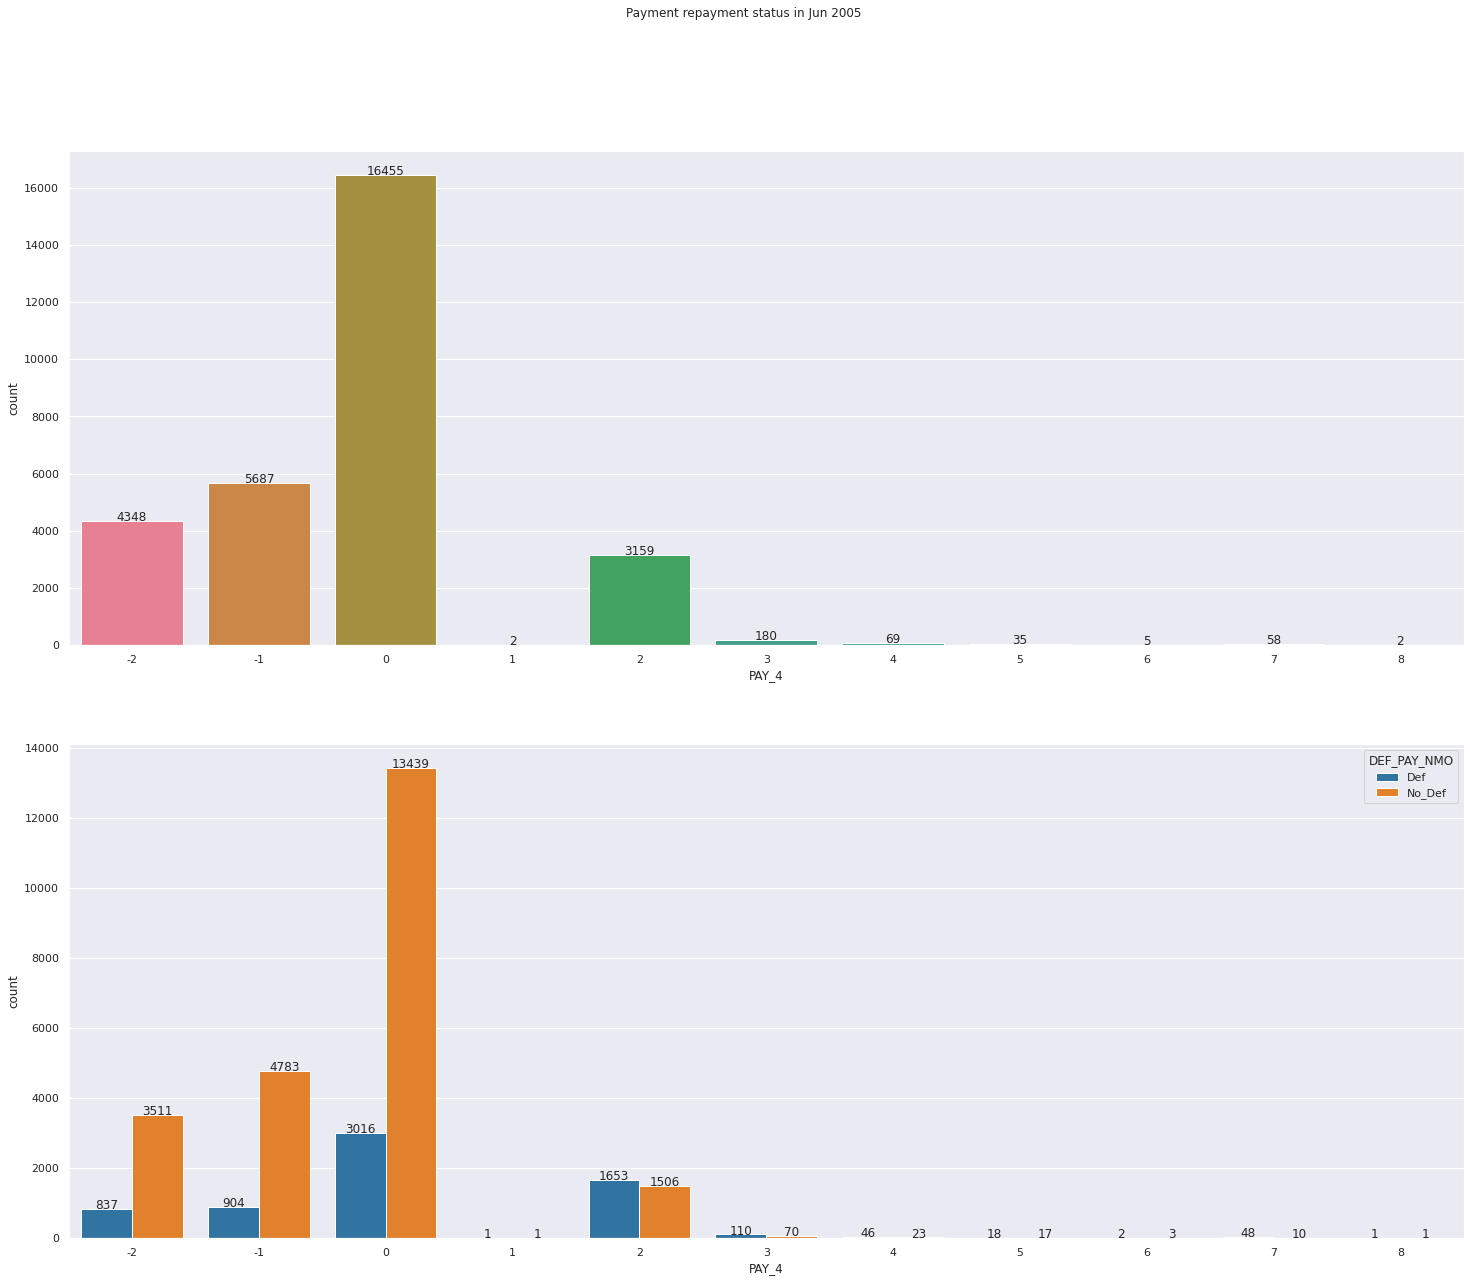

In [ ]:
# Looking into the nature of Pay_4
fig,ax = plt.subplots(2,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Jun 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_4',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_4',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

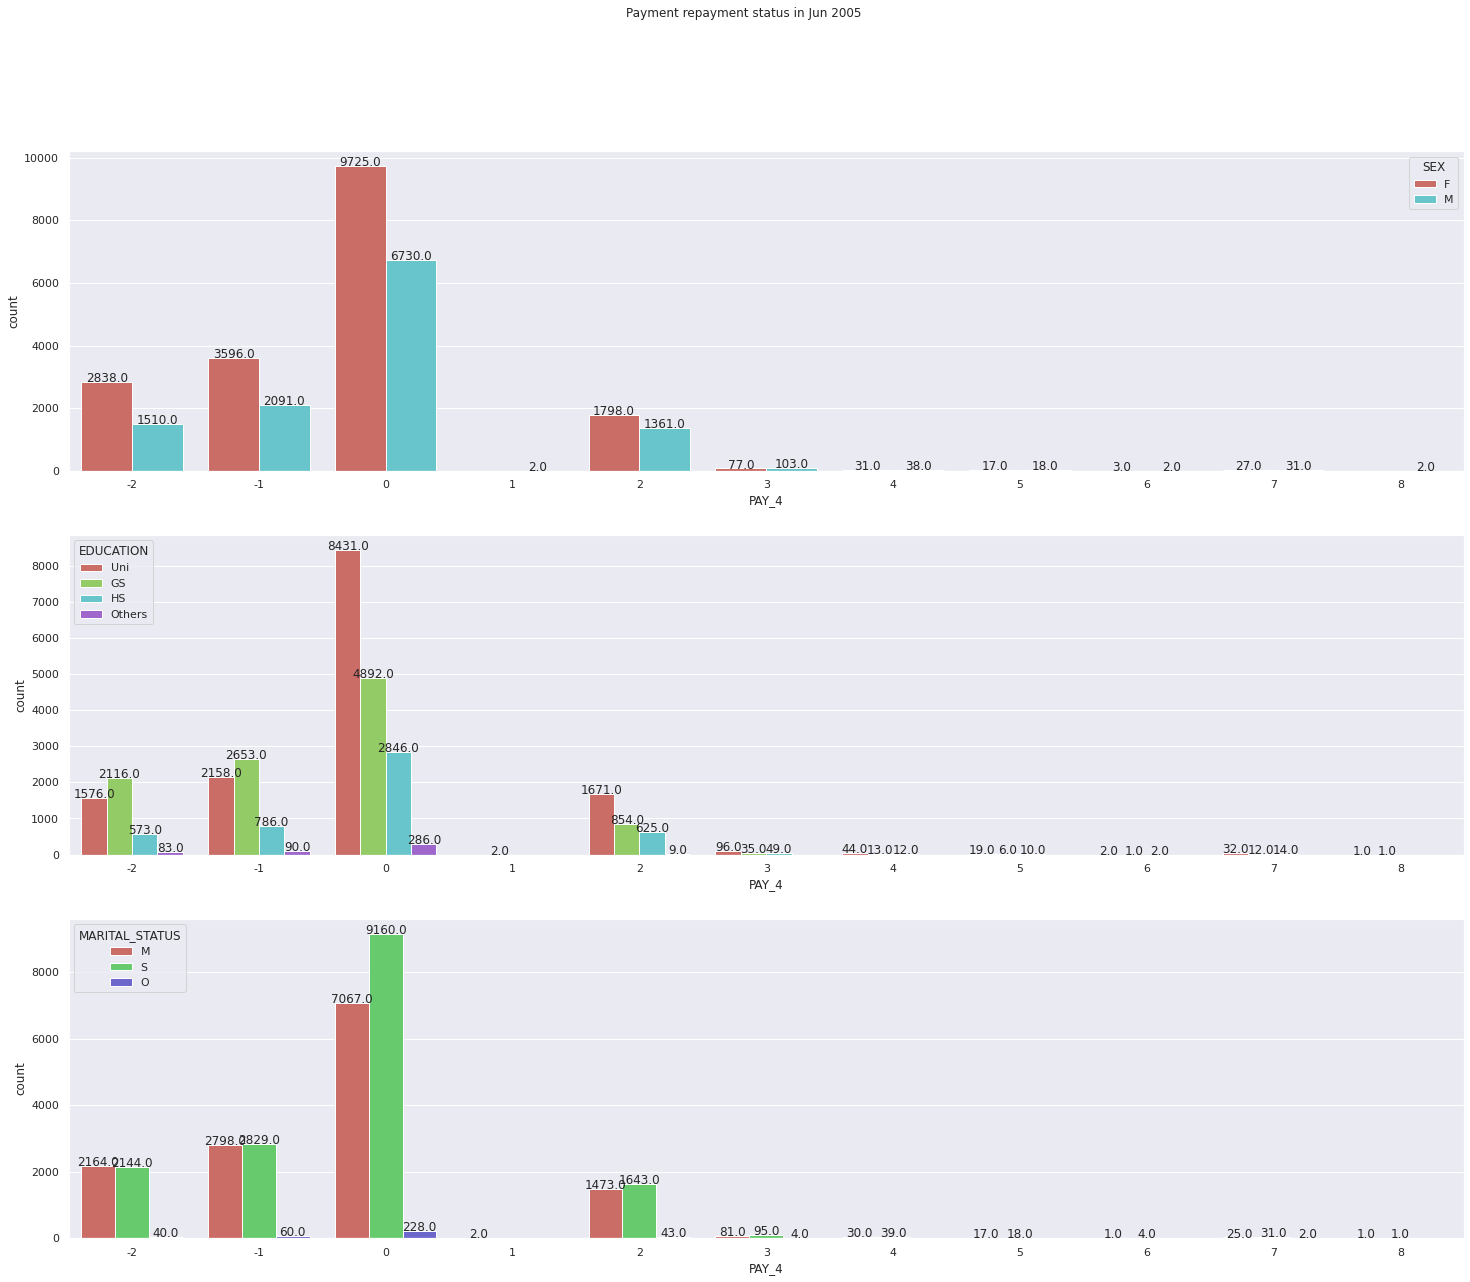

In [ ]:
# Looking into the nature of Pay_4
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in Jun 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_4',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_4',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_4',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Pay 5

> The repayment status in May, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


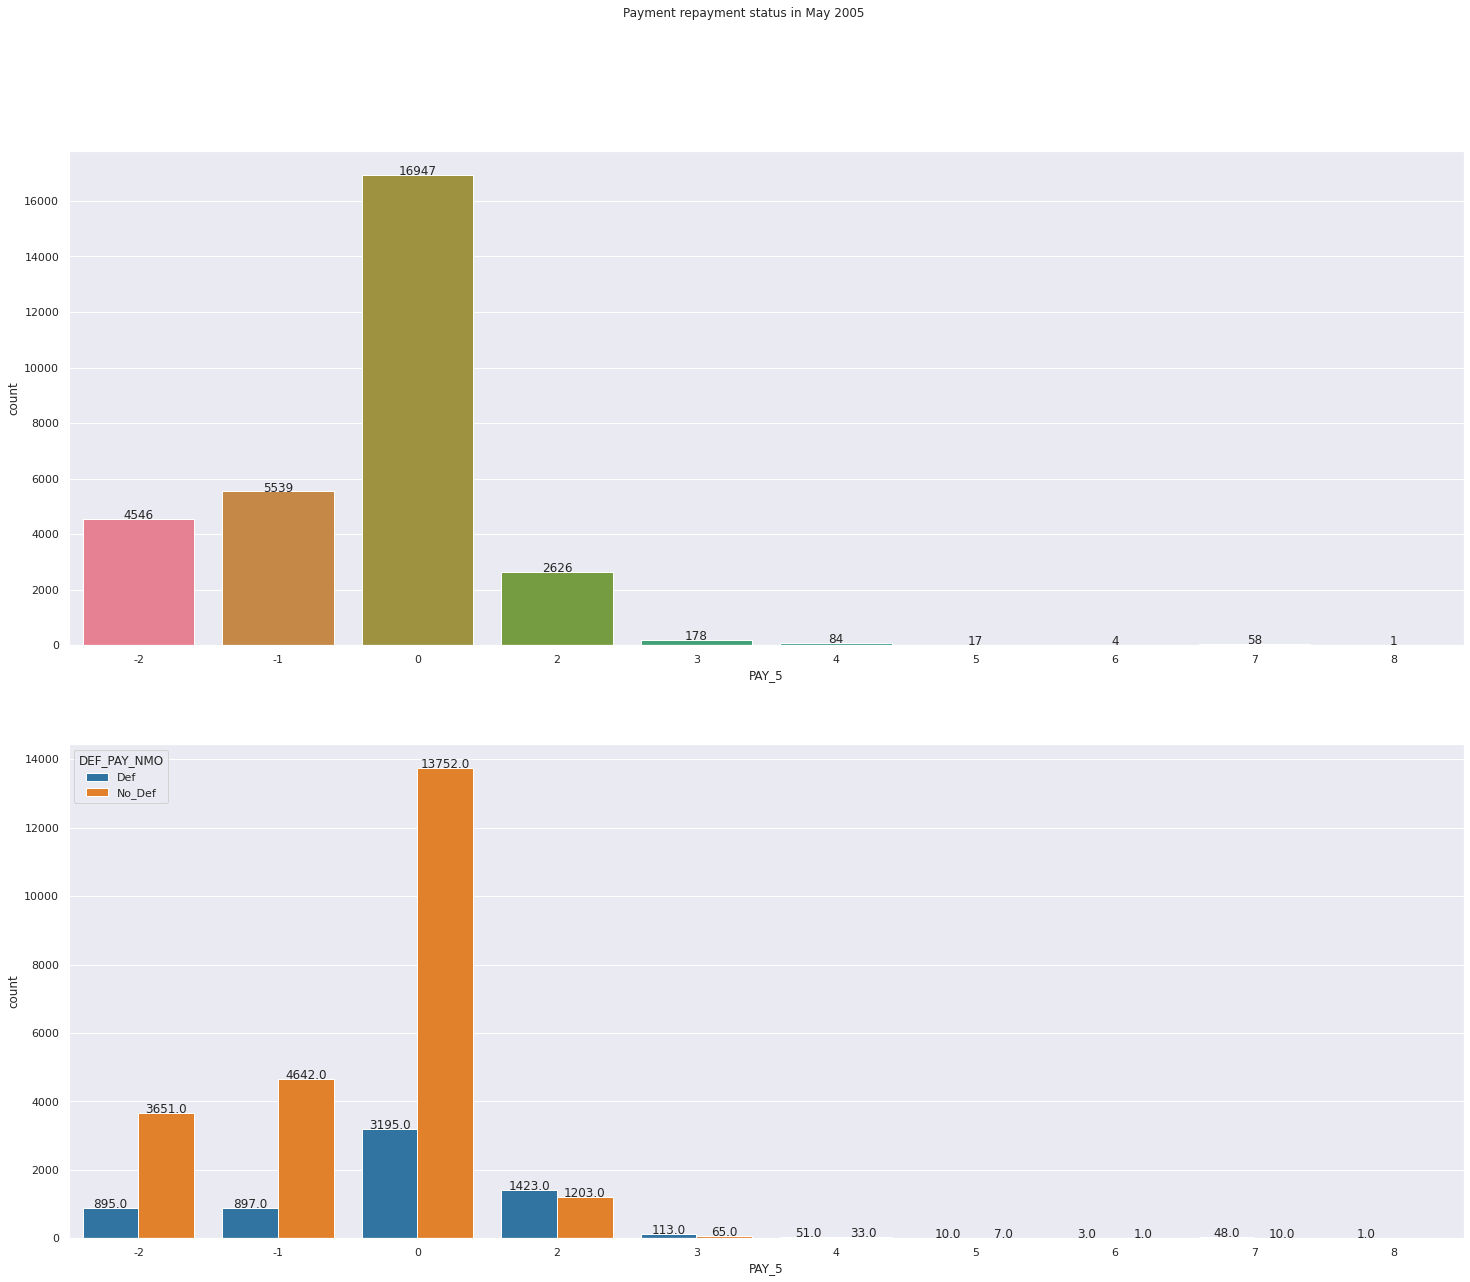

In [ ]:
# Looking into the nature of Pay_5
fig,ax = plt.subplots(2,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in May 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_5',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_5',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

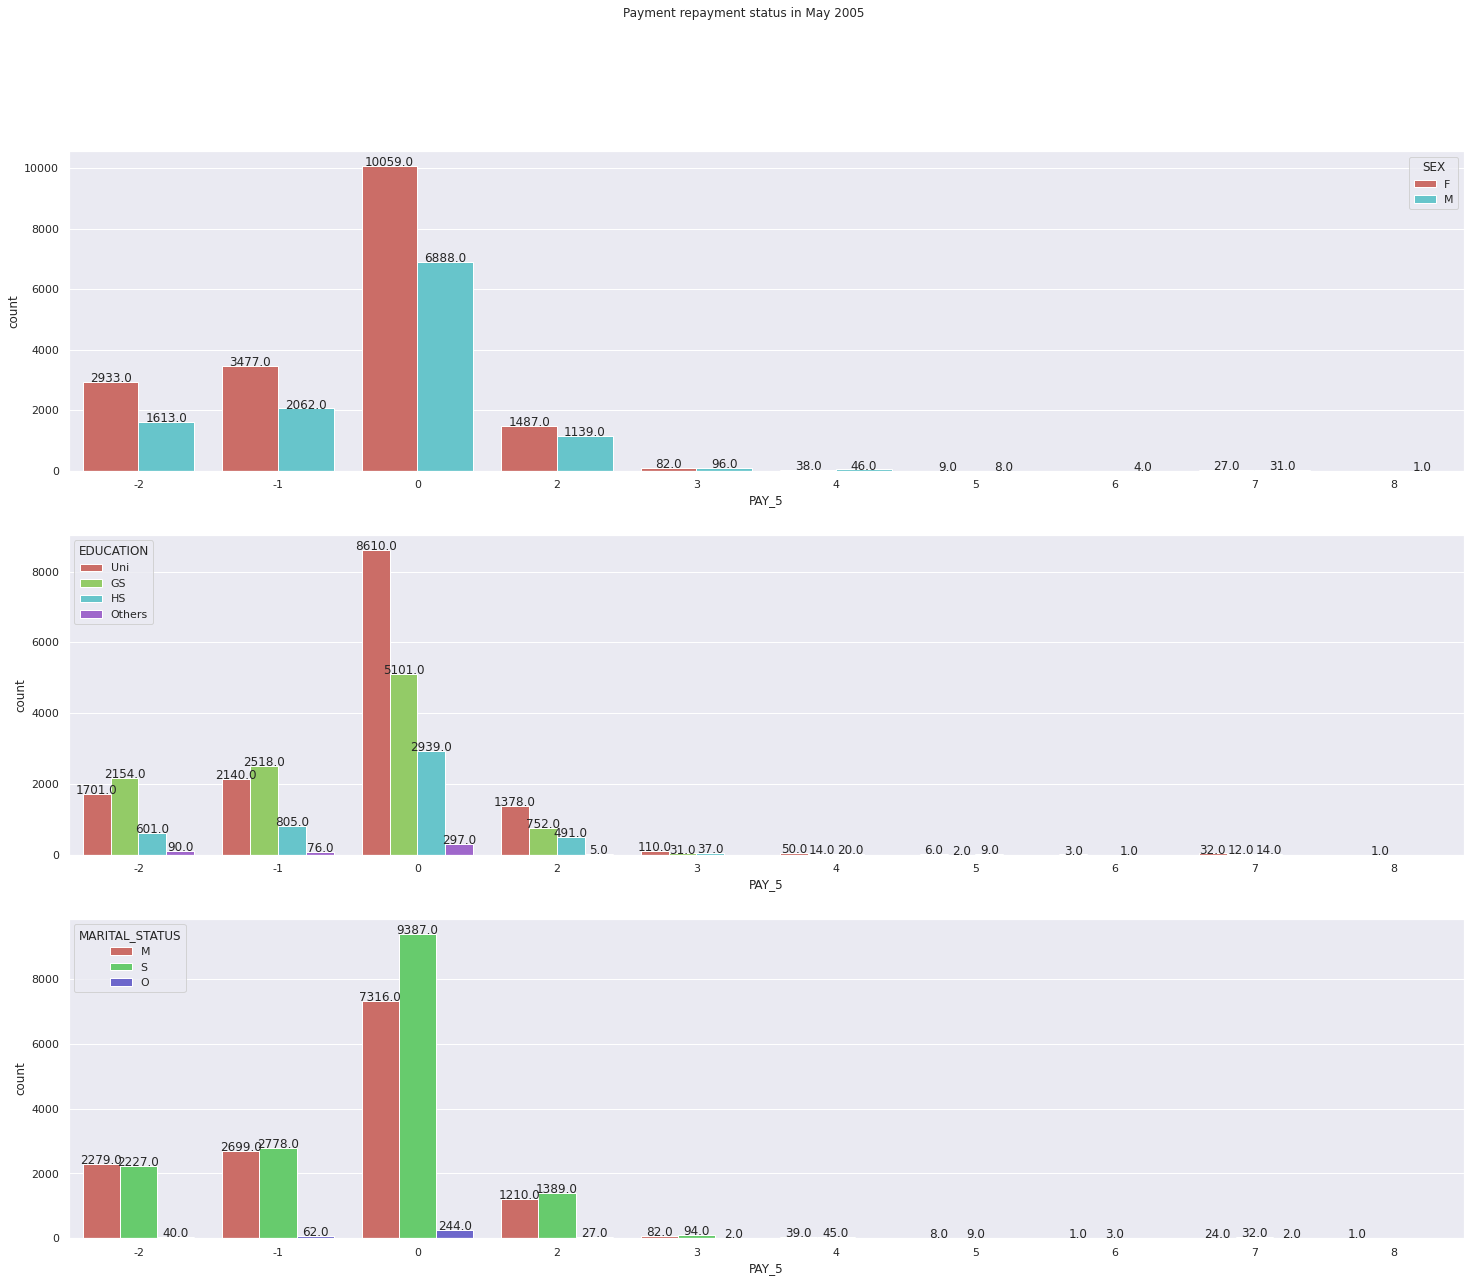

In [ ]:
# Looking into the nature of Pay_5
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in May 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_5',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_5',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_5',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

#### <b> Pay 6

> The repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


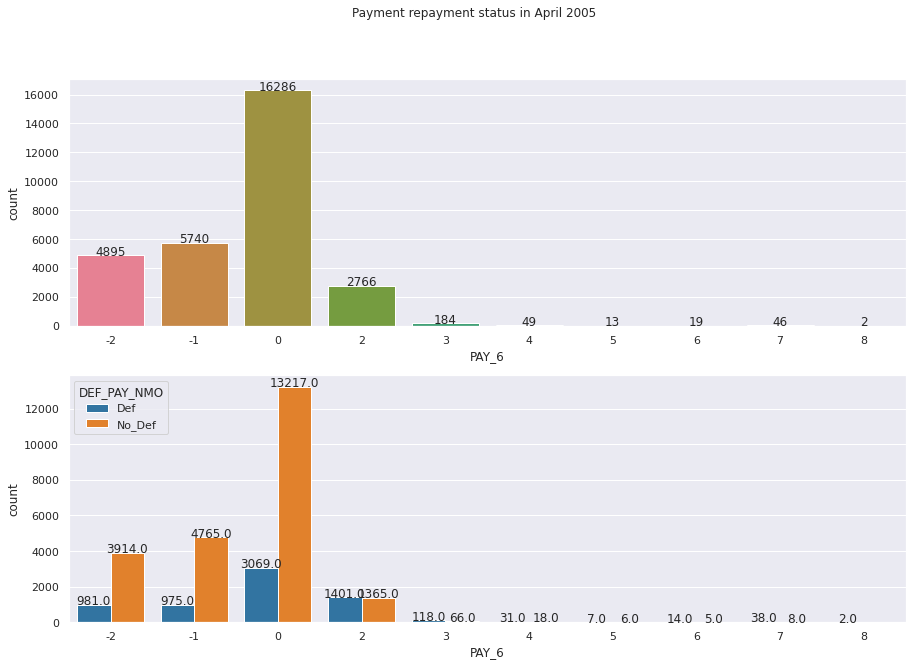

In [ ]:
# Looking into the nature of Pay_6
fig,ax = plt.subplots(2,1,figsize = (15,10))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in April 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_6',palette = "husl",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_6',hue='DEF_PAY_NMO',palette='tab10',ax = ax[1])
for p in np.arange(2):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

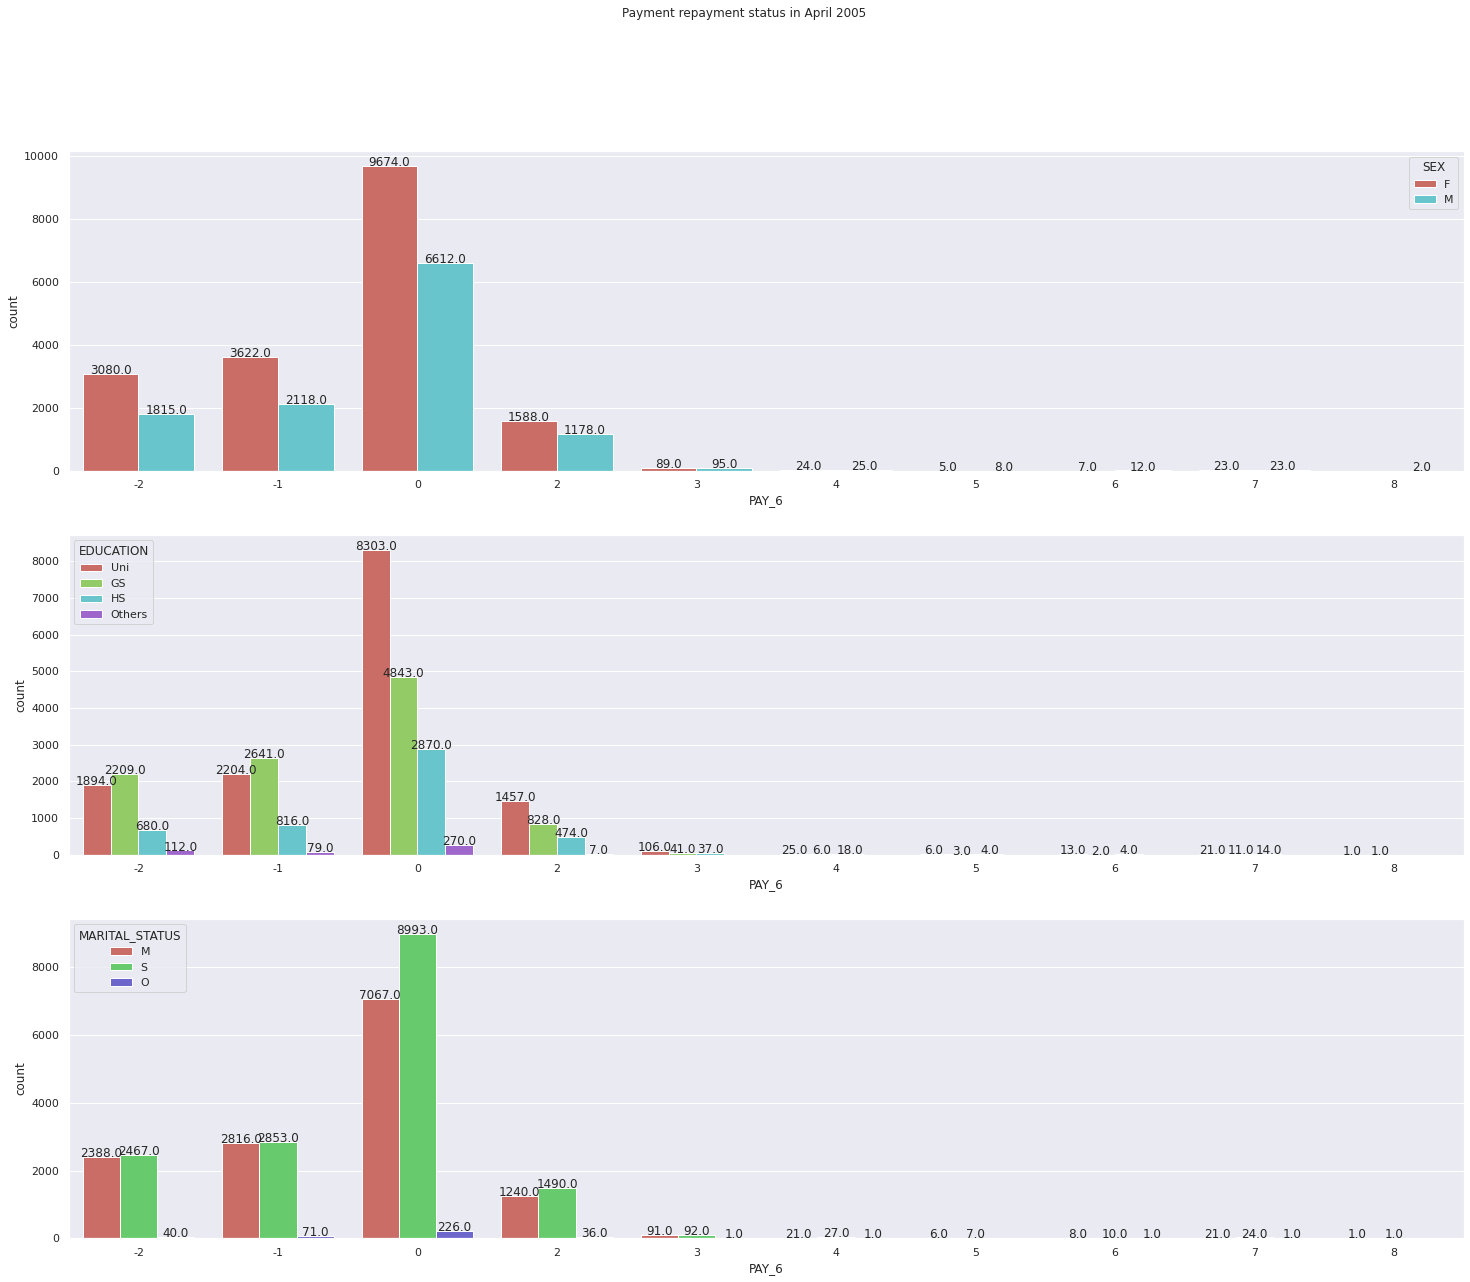

In [ ]:
# Looking into the nature of Pay_6
fig,ax = plt.subplots(3,1,figsize = (25,20))
sns.set_theme(style="darkgrid")
fig.suptitle('Payment repayment status in April 2005', fontsize=12)
sns.countplot(data=credit_data,x='PAY_6',hue='SEX',palette = "hls",ax = ax[0])
sns.countplot(data=credit_data,x='PAY_6',hue='EDUCATION',palette = "hls",ax = ax[1])
sns.countplot(data=credit_data,x='PAY_6',hue='MARITAL_STATUS',palette = "hls",ax = ax[2])
for p in np.arange(3):
  for i in ax[p].patches:
    height = i.get_height()
    width = i.get_width()
    ax[p].text(i.get_x() + width/2, height + 1,height ,ha="center") 

* <b>Comment : The above repayment status indicaties measured scale from -1 to 9. But in chart there are measured scales like -2, 0. If -2 : No consumption and 0 : Revolving credit.

### <b> - Amount of Bill Statement

> Amount of bill statement from April to September 2005



In [ ]:
bill = credit_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


#### <b> Bill Amount 1

> Amount of bill statement in September 2005.



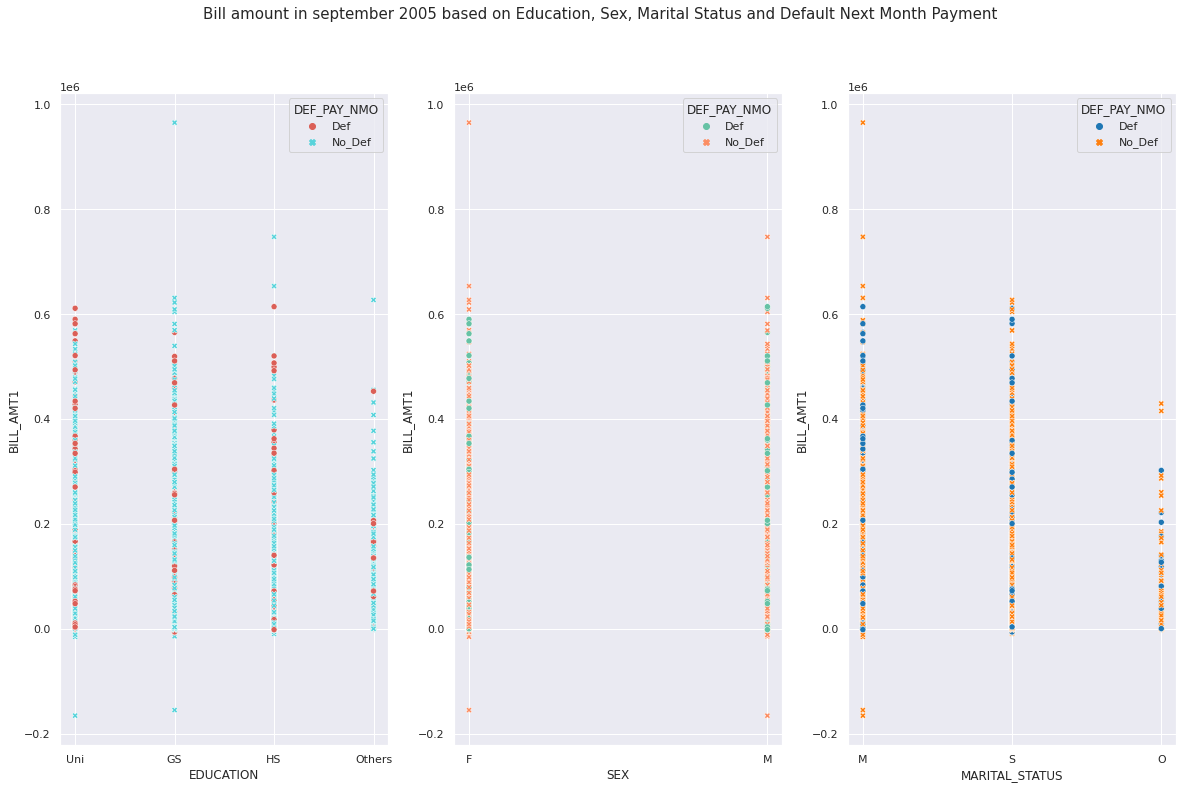

In [ ]:
# Bill Amount 1
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in september 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Bill Amount 2

> Amount of bill statement in August 2005.



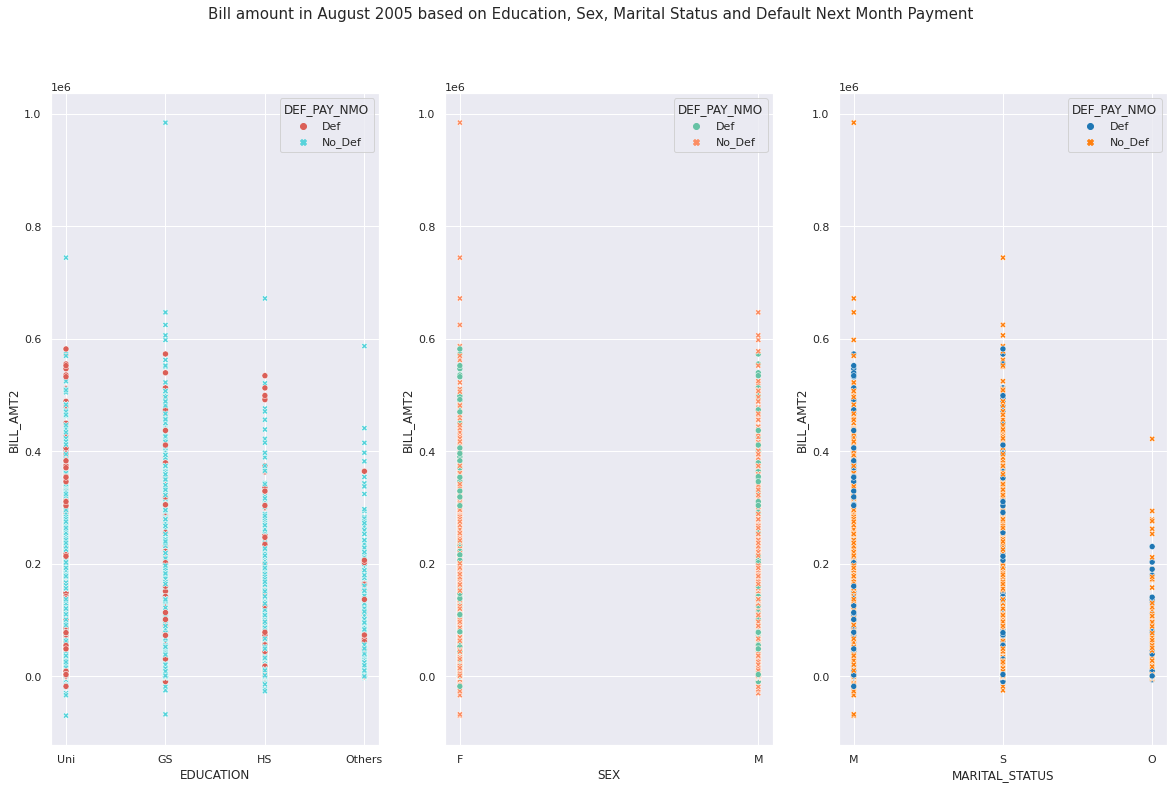

In [ ]:
# Bill Amount 2
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in August 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Bill Amount 3

> Amount of bill statement in July 2005.



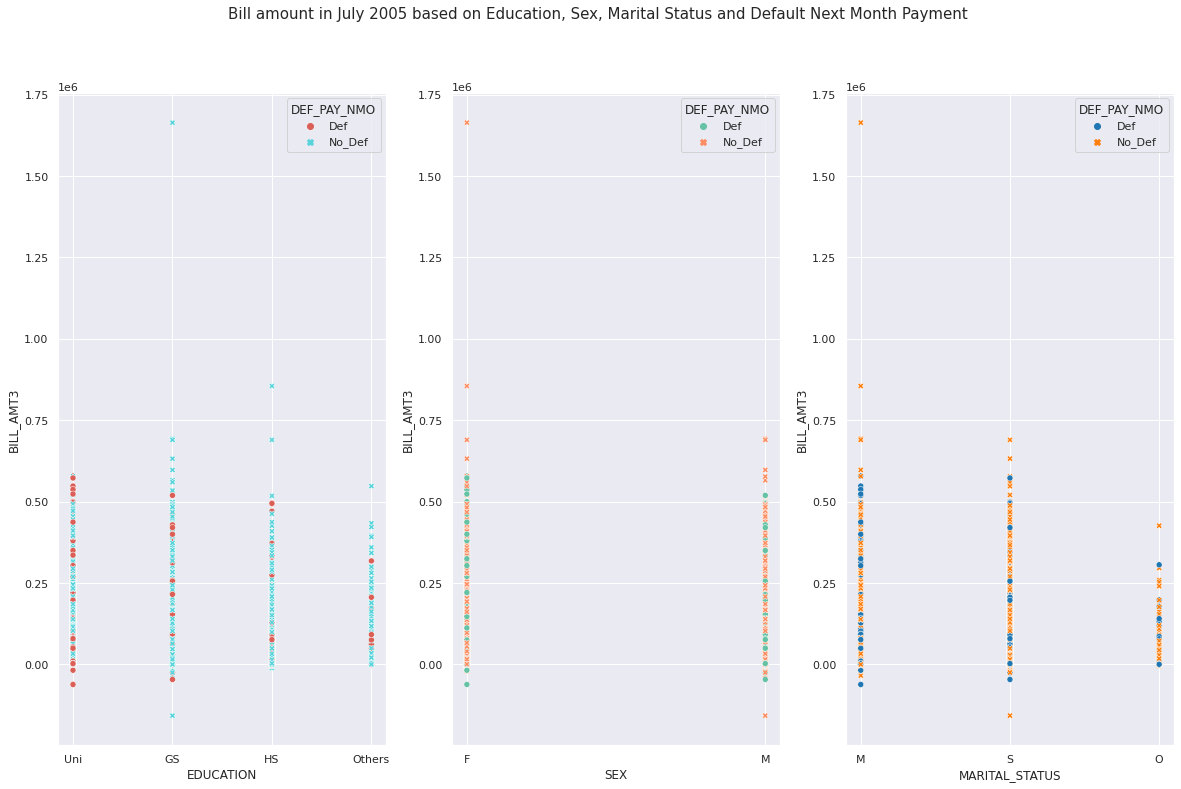

In [ ]:
# Bill Amount 3
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in July 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Bill Amount 4

> Amount of bill statement in June 2005.



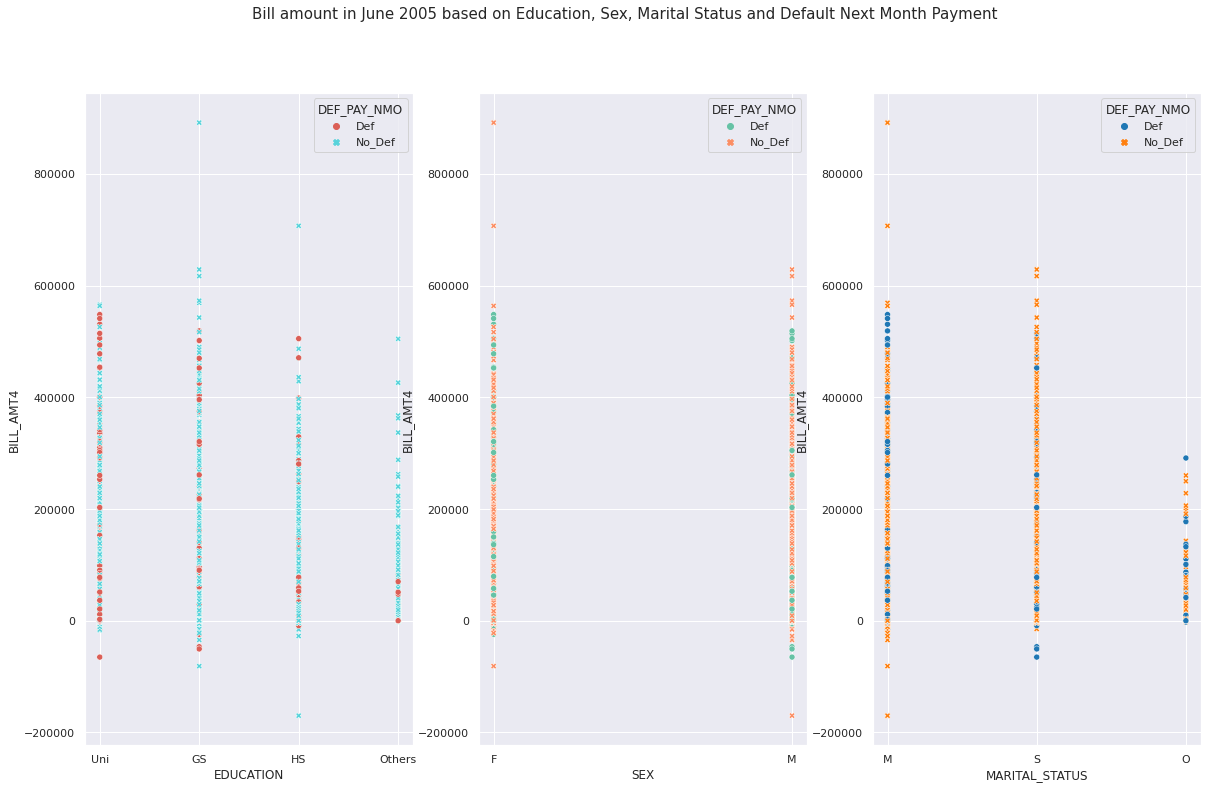

In [ ]:
# Bill Amount 4
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in June 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Bill Amount 5

> Amount of bill statement in May 2005.



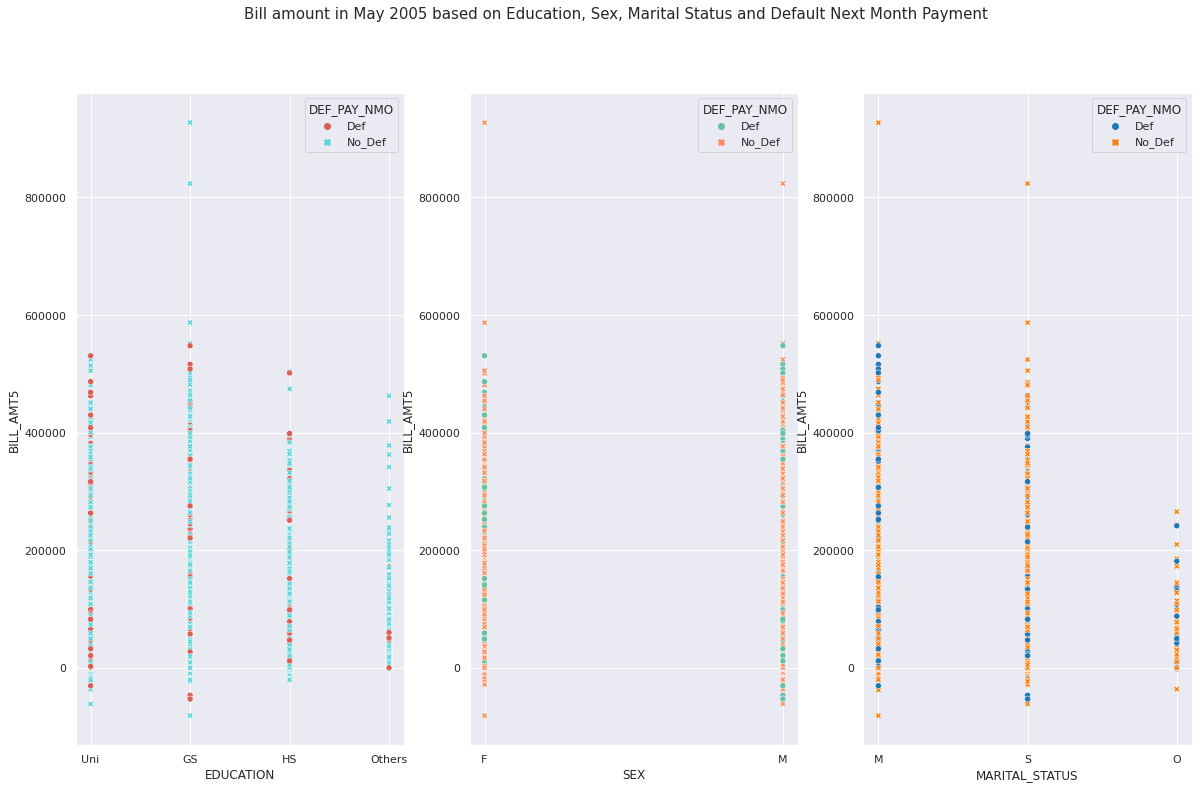

In [ ]:
# Bill Amount 5
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in May 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Bill Amount 6

> Amount of bill statement in April 2005.



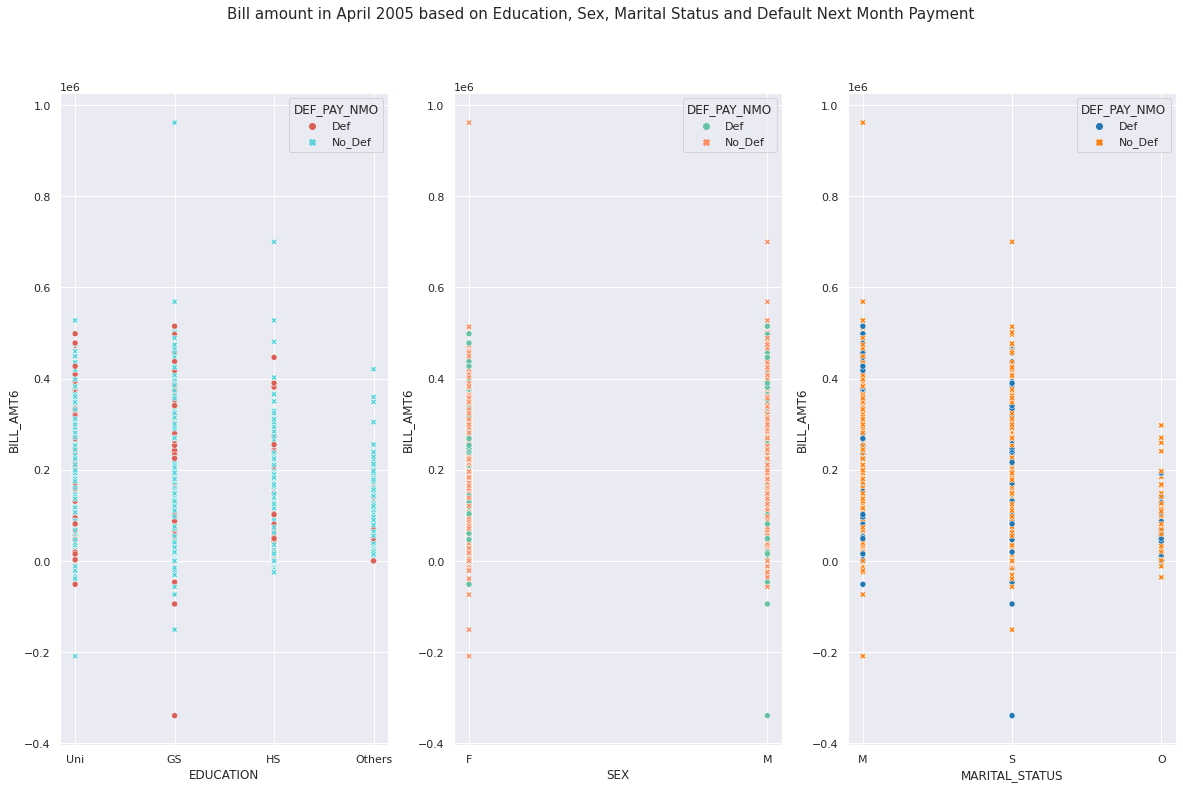

In [ ]:
# Bill Amount 6
fig,ax = plt.subplots(1,3,figsize = (20,12))
fig.suptitle('Bill amount in April 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='BILL_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='BILL_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='BILL_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

### <b> - Amount of Previous Payment

> Amount of previous payment (NT dollar). History of previous payment from April to September 2005.



#### <b> Payment Amount 1

> Amount of previous payment in September 2005. 



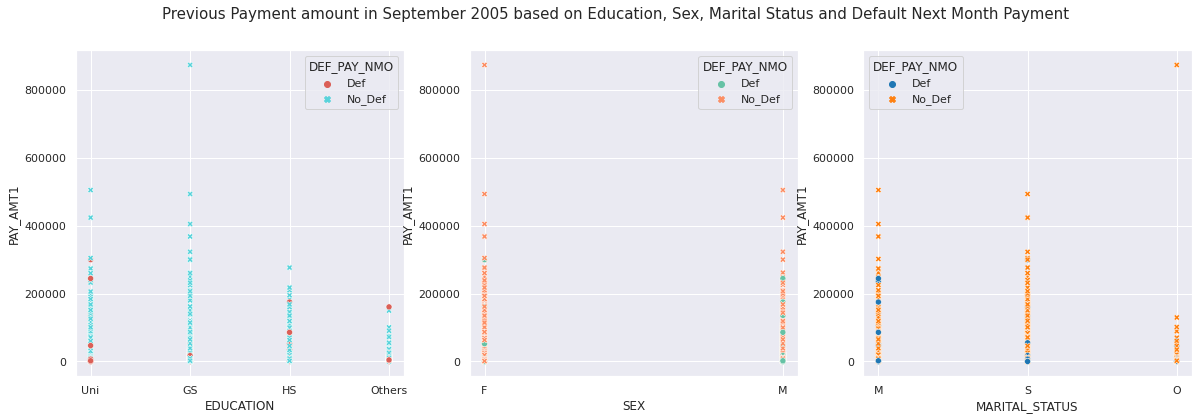

In [ ]:
# Previous Payment Amount 1
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in September 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT1',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Payment Amount 2

> Amount of previous payment in August 2005.



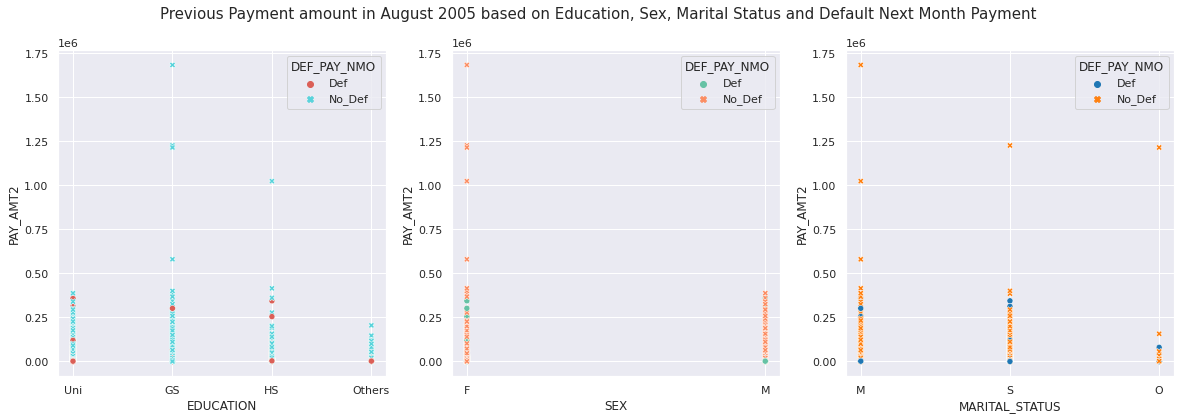

In [ ]:
# Previous Payment Amount 2
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in August 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT2',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Payment Amount 3

> Amount of previous payment in July 2005.



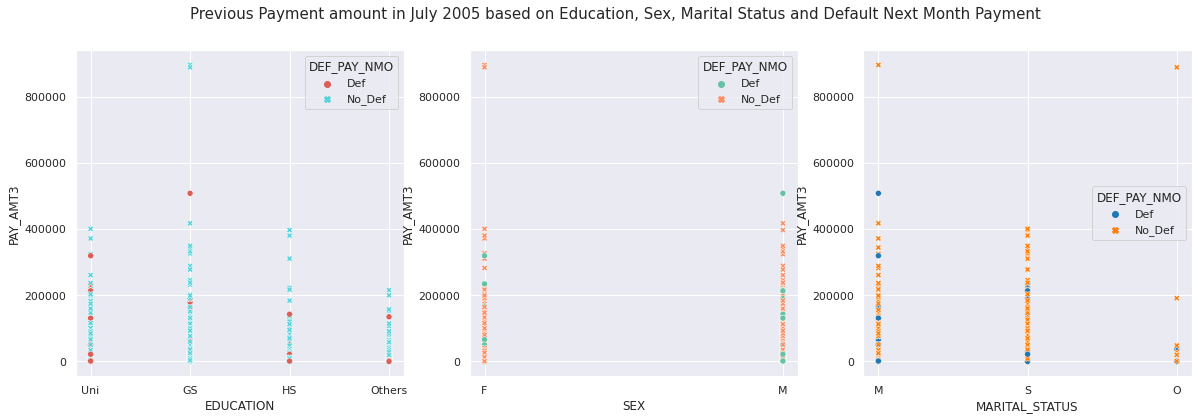

In [ ]:
# Previous Payment Amount 3
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in July 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT3',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Payment Amount 4

> Amount of previous payment in June 2005.



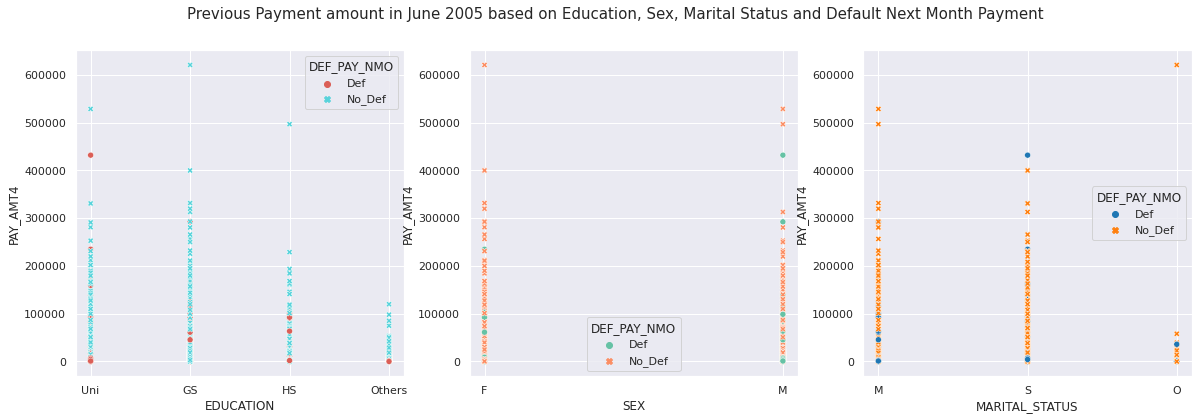

In [ ]:
# Previous Payment Amount 4
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in June 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT4',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Payment Amount 5

> Amount of previous payment in May 2005.



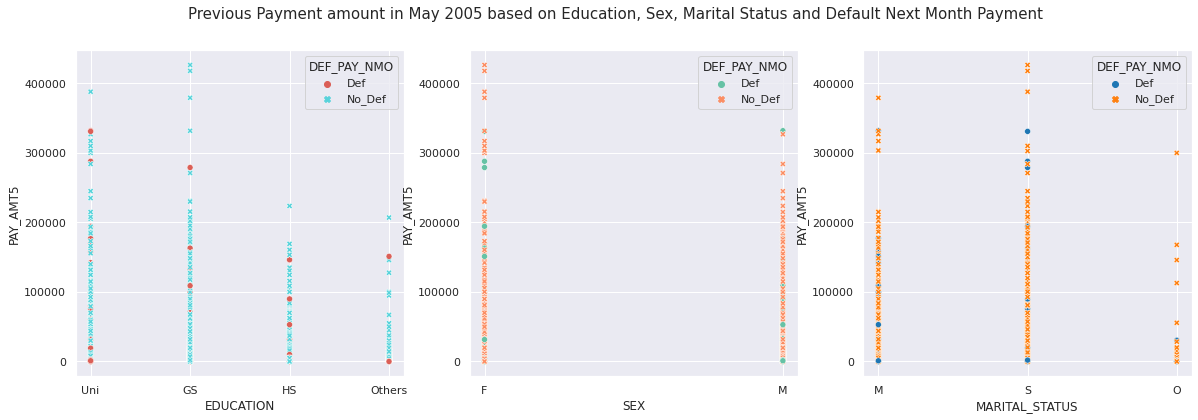

In [ ]:
# Previous Payment Amount 5
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in May 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT5',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

#### <b> Payment Amount 6

> Amount of previous payment in April 2005.



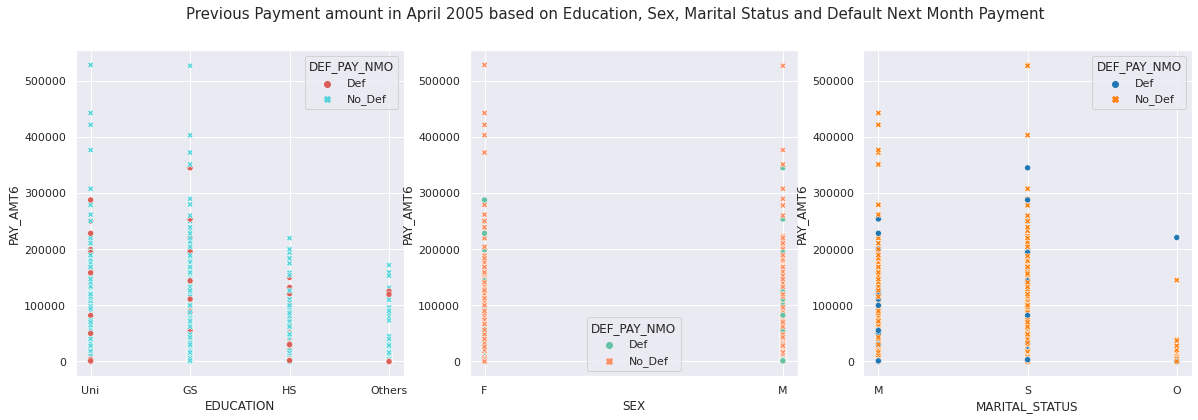

In [ ]:
# Previous Payment Amount 6
fig,ax = plt.subplots(1,3,figsize = (20,6))
fig.suptitle('Previous Payment amount in April 2005 based on Education, Sex, Marital Status and Default Next Month Payment',fontsize = 15)
sns.scatterplot(data=credit_data,x='EDUCATION',y='PAY_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='hls',ax=ax[0])
sns.scatterplot(data=credit_data,x='SEX',y='PAY_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='Set2',ax=ax[1])
sns.scatterplot(data=credit_data,x='MARITAL_STATUS',y='PAY_AMT6',hue='DEF_PAY_NMO',style='DEF_PAY_NMO',palette='tab10',ax=ax[2])

# <b> Feature Engineering

---



### <b> - Data Imputation

In [ ]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
credit_data['AGE'] = pd.cut(credit_data['AGE'],bins=bins, labels=labels,right=False)

In [ ]:
# Covert categorical column into integer by extracting the code of the categories
credit_data.AGE = credit_data.AGE.cat.codes

In [ ]:
# Changing values like 1 to male and 2 to female
credit_data.SEX = credit_data.SEX.replace({'M':1,'F':2})

In [ ]:
# Changing values like 5 and 6 to 0
credit_data.EDUCATION = credit_data.EDUCATION.replace({'Others':0,'GS':1,'Uni':2,'HS':3})

In [ ]:
# Changing values like 0 to others
credit_data.MARITAL_STATUS = credit_data.MARITAL_STATUS.replace({'M':1,'S':2,'O':3,})

In [ ]:
# Changing values like 1 to Def and 2 to No Def
credit_data.DEF_PAY_NMO = credit_data.DEF_PAY_NMO.replace({'No_Def':0,'Def':1})

In [ ]:
# Dropping id from the dataset
credit_data = credit_data.reset_index(drop=True)

In [ ]:
# Define predictor variables and target variable
X = credit_data.drop(columns=['DEF_PAY_NMO'])
y = credit_data['DEF_PAY_NMO']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE'])
numerical_columns = X_num.columns.tolist()

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,3,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
# One Hot Encoding
X = pd.get_dummies(data=X,columns=['SEX','EDUCATION','MARITAL_STATUS'])

### <b> - Train Test Split - Using SMOTE

> As there is imbalance in dependent variable we need to make those imbalance by oversampling by Synthetic Minority Oversampling Technique.



In [ ]:
# fit predictor and target variable
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_sample(X,y)

In [ ]:
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23364, 0: 23364})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
print('Train dataset shape: ',X_train.shape)
print('Test dataset shape: ',X_test.shape)

Train dataset shape:  (21000, 29)
Test dataset shape:  (9000, 29)


### <b> - Standardizing the Data

In [ ]:
# Apply standardization on numerical features only
X_train_std = X_train.copy()
X_test_std = X_test.copy()
    
scaler = StandardScaler().fit(X_train_std)  
X_train_std = scaler.transform(X_train_std) 
X_test_std = scaler.transform(X_test_std)

In [ ]:
X_train_std

array([[-0.05779064, -0.08413606,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       [-0.52016864, -0.08413606,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       [-0.67429464, -1.11557643,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       ...,
       [-0.36604264, -1.11557643,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       [ 1.48346935,  1.97874467,  0.9036499 , ...,  1.09749395,
        -1.06986347, -0.11326592],
       [ 1.02109135, -0.08413606, -0.87660696, ...,  1.09749395,
        -1.06986347, -0.11326592]])

In [ ]:
X_test_std

array([[ 0.48165035, -0.08413606,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       [-0.67429464, -0.08413606, -0.87660696, ...,  1.09749395,
        -1.06986347, -0.11326592],
       [-0.52016864, -1.11557643,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       ...,
       [-0.44310564, -1.11557643,  0.01352147, ..., -0.91116676,
         0.93469871, -0.11326592],
       [ 2.17703634, -0.08413606,  0.9036499 , ..., -0.91116676,
        -1.06986347,  8.82878069],
       [-0.59723164, -0.08413606,  0.01352147, ...,  1.09749395,
        -1.06986347, -0.11326592]])

In [ ]:
y_train.head()

11018    0
1710     1
4618     0
5482     0
26187    0
Name: DEF_PAY_NMO, dtype: int64

In [ ]:
y_test.head()

8941     0
17618    1
27895    0
16103    0
4422     0
Name: DEF_PAY_NMO, dtype: int64

In [ ]:
y_test.isna().sum()

0

# <b> Predictive Analytics - ML Modelling

---


### <b> - Classification Models Evaluation Function

#### <b> Precision, Recall and F1 Score

In [ ]:
# Function for Evaluating Classification Model (Precision, Recall and F1 score)
def get_scores(model,X_test,y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
    return precision, recall, F1

#### <b> KS-Chart

In [ ]:
# Function for Evaluating Classification Model by KS-Chart

def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

### <b> - Logistic Regression

In [ ]:
# Model Fitting
logreg = LogisticRegression(solver='saga',random_state=42).fit(X_train_std,y_train)
lr_scores = cross_val_score(logreg, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {lr_scores.mean()}')

The Training roc_auc Score is 0.726770434904512


In [ ]:
# Hyperparameter Tuning 
# Parameters
maximum_it = range(100,200,10)
l1_ratios = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
c_value = [1e-6,1e-5,1e-2,1e-1,1,10,100,1e+4,1e+5]
param_dict = [{"max_iter" : maximum_it,"l1_ratio" : l1_ratios,"C":c_value}]

In [ ]:
# Randomized Search Cross Validation for hyperparameter tuning
logregcv = LogisticRegression(penalty='elasticnet',solver='saga')
lr_randomCV = RandomizedSearchCV(estimator=logregcv,param_distributions=param_dict,scoring='roc_auc',cv=5,verbose=2,n_jobs=-1,random_state=42)
lr_randomCV.fit(X_train_std,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='elasticnet',
                                                random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [1e-06, 1e-05, 0.01, 0.1, 1, 10,
                                               100, 10000.0, 100000.0],
                                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,


In [ ]:
# Selecting the best model
print(f"The Best Parameters for Logistic Regression is {lr_randomCV.best_params_}")
lr_optimalmodel = lr_randomCV.best_estimator_

The Best Parameters for Logistic Regression is {'max_iter': 160, 'l1_ratio': 0.6, 'C': 1}


In [ ]:
# Get the predicted probabilities
train_preds = lr_optimalmodel.predict_proba(X_train_std)
test_preds = lr_optimalmodel.predict_proba(X_test_std)

In [ ]:
# Hyperparameter tuned training results
lr_tuned_scores = cross_val_score(lr_optimalmodel, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {lr_tuned_scores.mean()}')

The Training roc_auc Score is 0.7268045935857368


In [ ]:
# Evaluating the model
print(f"Logistic Regression Model Evaluation Scores is {lr_optimalmodel.score(X_test_std,y_test):.4f}")
get_scores(lr_optimalmodel,X_test_std,y_test)

Logistic Regression Model Evaluation Scores is 0.8090
Precision:0.701
Recall:0.239
F1 score:0.356


(0.700589970501475, 0.23857358111501759, 0.35593855376545525)

### <b> - Support Vector Machine

In [ ]:
# Model Fitting
svm = SVC().fit(X_train_std,y_train)
svc_scores = cross_val_score(svm, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {svc_scores.mean()}')

The Training roc_auc Score is 0.7186241488712992


In [ ]:
# Hyperparameter Tuning
# Parameters
parameters = [{ "C" : [0.1,0.3,0.33,0.331,0.34,0.24,0.29], 
                "gamma" : ['scale',0.081,0.095,0.08,0.06,0.3,0.09,0.1,0.091,0.25], 
                "kernel" : ['rbf'] },]

In [ ]:
# Randomized Search Cross Validation for finding best hyperparameter tuning
clf_svm = SVC(probability=True)
SVC_CV = RandomizedSearchCV(estimator = clf_svm,param_distributions= parameters,verbose=2,n_jobs=-1,cv=3,scoring='roc_auc')
SVC_CV.fit(X_train_std,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions=[{'C': [0.1, 0.3, 0.33, 0.331, 0.34,
                                               0.24, 0.29],
                                         'gamma': ['scale', 0.081, 0.095, 0.08,
                                                   0.06, 0.3, 0.09, 0.1, 0.091,
                                                   0.25],
                                         'kernel': ['rbf']}],
                   pre_dispatch='2*n_jobs', random_

In [ ]:
# Selecting the best model
print(f"The Best Parameters for Support Vector Classifier is {SVC_CV.best_params_}")
SVC_optimalmodel = SVC_CV.best_estimator_

The Best Parameters for Support Vector Classifier is {'kernel': 'rbf', 'gamma': 0.095, 'C': 0.1}


In [ ]:
# Hyperparameter tuned training results
SVC_tuned_scores = cross_val_score(SVC_optimalmodel, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {SVC_tuned_scores.mean()}')

The Training roc_auc Score is 0.7173758761389106


In [ ]:
# Evaluating the model
print(f"Support Vector Classifier Model Evaluation Scores is {SVC_optimalmodel.score(X_test_std,y_test):.4f}")
get_scores(SVC_optimalmodel,X_test_std,y_test)

Support Vector Classifier Model Evaluation Scores is 0.8076
Precision:0.654
Recall:0.277
F1 score:0.389


(0.6536180308422301, 0.2767453540934204, 0.38884968242766405)

### <b> - Random Forest

In [ ]:
# Model Fitting
ranfor = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,random_state=True,verbose=2).fit(X_train_std,y_train)
ranfor_scores = cross_val_score(ranfor, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {ranfor_scores.mean()}')

building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.7s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_j

The Training roc_auc Score is 0.7643223763384988


In [ ]:
# Hyperparameter Tuning
# Parameter
# Number of trees
n_estimators = [50, 100, 150, 200]

# Maximum depth of trees
max_depth = [10, 30, 60, 90, 120, 150]

# Minimum number of samples required to split a node
min_samples_split = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 6, 7, 8, 9, 10]

# Hyperparameter Grid
param_dict_ranfor = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 
                     'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Randomized Search Cross Validation for finding best hyperparameter tuning
clf_ranfor = RandomForestClassifier()
ranfor_CV = RandomizedSearchCV(estimator = clf_ranfor,param_distributions= param_dict_ranfor,verbose=2,n_jobs=-1,cv=5,random_state=True,scoring='roc_auc')
ranfor_CV.fit(X_train_std,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Selecting the best model
print(f"The Best Parameters for Random Forest Classifier is {ranfor_CV.best_params_}")
ranfor_optimalmodel = ranfor_CV.best_estimator_

The Best Parameters for Random Forest Classifier is {'n_estimators': 200, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_depth': 10}


In [ ]:
# Hyperparameter tuned training results
ranfor_tuned_scores = cross_val_score(ranfor_optimalmodel, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {ranfor_tuned_scores.mean()}')

The Training roc_auc Score is 0.7826463368763367


In [ ]:
# Evaluating the model
print(f"Random Forest Classifier Model Evaluation Scores is {ranfor_optimalmodel.score(X_test_std,y_test):.4f}")
get_scores(ranfor_optimalmodel,X_test_std,y_test)

Random Forest Classifier Model Evaluation Scores is 0.8162
Precision:0.660
Recall:0.350
F1 score:0.457


(0.6597156398104266, 0.3495730788548468, 0.4569927774130007)

### <b> - Xtreme Gradient Boosting 

In [ ]:
# Model Fitting
xgbClass = XGBClassifier().fit(X_train_std, y_train)
xgbClass_scores = cross_val_score(xgbClass, X_train_std, y_train, cv= 5,scoring='roc_auc')
print(f'The Training roc_auc Score is {xgbClass_scores.mean()}')

The Training roc_auc Score is 0.7820942035877146


In [ ]:
# Hyperparameter Tuning
# Parameters
params = {'gamma':0,
          'learning_rate':0.01, 
          'max_depth':3, 
          'colsample_bytree':0.6,
          'subsample':0.8,
          'scale_pos_weight':3.5,
          'n_estimators':1000,
          'objective':'binary:logistic', 
          'reg_alpha':0.3    
}

In [ ]:
clf_xgb = XGBClassifier(**params)
xgbscores = cross_val_score(clf_xgb, X_train_std, y_train, scoring ="roc_auc", cv = 5)
print(f'The Training roc_auc Score is {xgbscores.mean()}')

The Training roc_auc Score is 0.7843218563894011


In [ ]:
# Hyperparameter Tuning
# Parameters
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }

In [ ]:
# Randomized Search Cross Validation for finding best hyperparameter tuning
xgboost = XGBClassifier()
xgb_CV = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_CV.fit(X_train_std, y_train)   

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 46.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
     

In [ ]:
# Selecting the best model
print(f"The Best Parameters for Xtreme Gradient Boosting is {xgb_CV.best_params_}")
xgb_optimalmodel = xgb_CV.best_estimator_

The Best Parameters for Xtreme Gradient Boosting is {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5}


In [ ]:
# Evaluating the model
print(f"Xtreme Gradient Boosting Model Evaluation Scores is {xgb_optimalmodel.score(X_test_std,y_test):.4f}")
get_scores(xgb_optimalmodel,X_test_std,y_test)

Xtreme Gradient Boosting Model Evaluation Scores is 0.8166
Precision:0.655
Recall:0.361
F1 score:0.466


(0.6548269581056466, 0.3611250627825213, 0.46552282292003877)

# <b> Results Comparison

---


### <b> - Confusion Matrix

Text(0.5, 1.0, 'Xtreme Gradient Boosting - Classifier')

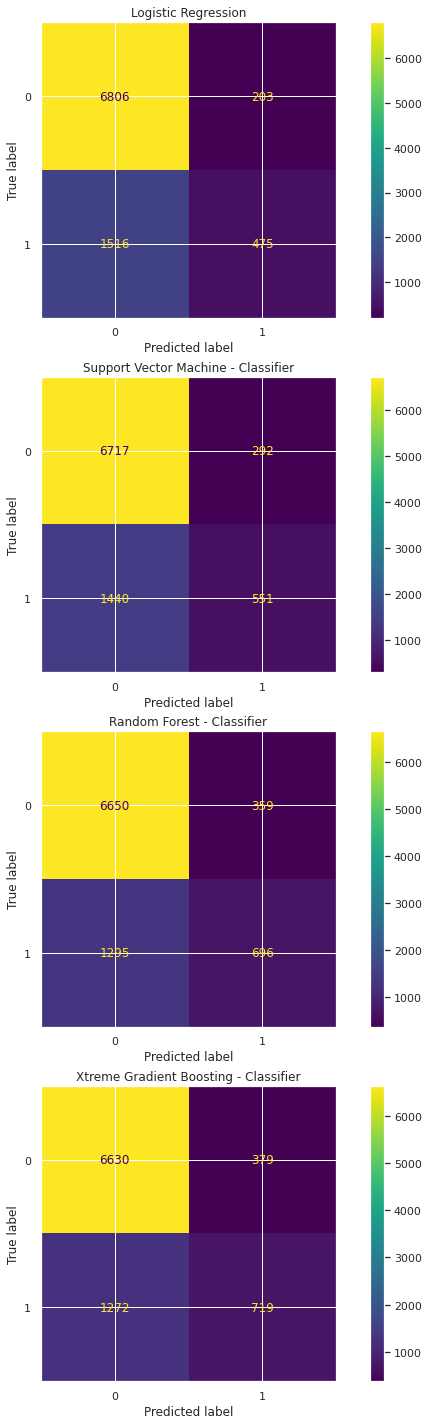

In [ ]:
# Confusion Matrix of Each Models
fig,ax = plt.subplots(4,1, figsize=(12,25))
plot_confusion_matrix(lr_optimalmodel, X_test_std, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")
plot_confusion_matrix(SVC_optimalmodel, X_test_std, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Support Vector Machine - Classifier")
plot_confusion_matrix(ranfor_optimalmodel, X_test_std, y_test, ax = ax[2], values_format="d")
ax[2].set_title("Random Forest - Classifier")
plot_confusion_matrix(xgb_optimalmodel, X_test_std, y_test, ax = ax[3], values_format="d")
ax[3].set_title("Xtreme Gradient Boosting - Classifier")

### <b> - ROC-AUC Curve

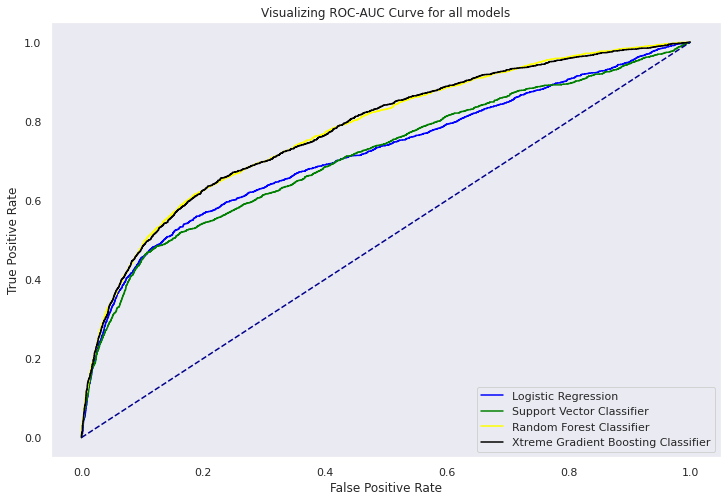

In [ ]:
# Visualizing ROC-AUC Curve for all models
fig,ax=plt.subplots(figsize=(12,8))
plot_roc_curve(lr_optimalmodel, X_test_std, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(SVC_optimalmodel, X_test_std, y_test,ax=ax, color="green",label='Support Vector Classifier')
plot_roc_curve(ranfor_optimalmodel, X_test_std, y_test,ax=ax, color="yellow",label='Random Forest Classifier')
plot_roc_curve(xgb_optimalmodel, X_test_std, y_test,ax=ax, color="black",label='Xtreme Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Visualizing ROC-AUC Curve for all models')
plt.grid()

### <b> - Overall Results

In [ ]:
# Function for Evaluating Classification Model (Precision, Recall and F1 score)
def get_score(model,X_test,y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    return precision.round(4), recall.round(4), F1.round(4)

In [ ]:
res = []
for models in [lr_optimalmodel,SVC_optimalmodel,ranfor_optimalmodel,xgb_optimalmodel]:
  res.append(pd.Series(get_score(model=models,X_test=X_test_std,y_test=y_test)))
  results = pd.concat(res,axis=1)
results.columns = ['Logistic_Regression','Support_Vector_Machine','Random_Forest_Classifier','XGBoost_Classifier']
names = ['Precision','Recall','F1_Score']
results['Scores'] = names
results.set_index('Scores',inplace=True)
results.index.name = None
results

,Logistic_Regression,Support_Vector_Machine,Random_Forest_Classifier,XGBoost_Classifier
Precision,0.7006,0.6536,0.6597,0.6548
Recall,0.2386,0.2767,0.3496,0.3611
F1_Score,0.3559,0.3888,0.4570,0.4655


### <b> - Precision Recall Curve

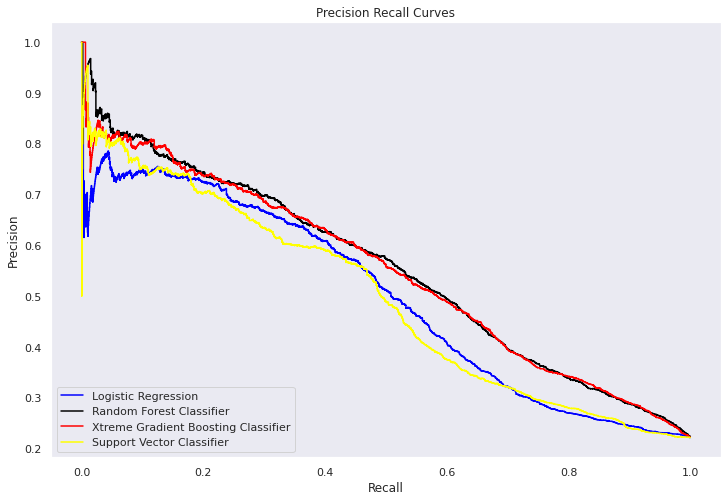

In [ ]:
# Visualizing Precision - Recall curves
fig,ax=plt.subplots(figsize=(12,8))
plot_precision_recall_curve(lr_optimalmodel, X_test_std, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(ranfor_optimalmodel, X_test_std, y_test, ax=ax,color="black",label='Random Forest Classifier')
plot_precision_recall_curve(xgb_optimalmodel, X_test_std, y_test, ax=ax,color="red",label='Xtreme Gradient Boosting Classifier')
plot_precision_recall_curve(SVC_optimalmodel,X_test_std,y_test,ax=ax,color="yellow",label="Support Vector Classifier")
plt.title('Precision Recall Curves')
plt.grid()

### <b> - KS Statistics

In [ ]:
# Dataframe for KS Statistics
probabilities = []
for models in [lr_optimalmodel,SVC_optimalmodel,ranfor_optimalmodel,xgb_optimalmodel]:
  probabilities.append(pd.Series(models.predict_proba(X_test_std)[:,1]))
  prob = pd.concat(probabilities,axis=1)
prob.columns = ['Logistic_Regression','Support_Vector_Classifier','Random_Forest_Classifier','XGBoost_Classifier']
prob['Y'] = np.array(y_test)

In [ ]:
prob

,Logistic_Regression,Support_Vector_Classifier,Random_Forest_Classifier,XGBoost_Classifier,Y
0,0.166125,0.158838,0.084649,0.065482,0
1,0.234272,0.186199,0.432028,0.516885,1
2,0.081898,0.152756,0.098854,0.110762,0
3,0.295322,0.312104,0.578624,0.641164,0
4,0.237456,0.157601,0.098382,0.142687,0
...,...,...,...,...,...
8995,0.138421,0.158485,0.076751,0.102256,0
8996,0.229969,0.158619,0.165563,0.147275,0
8997,0.176169,0.152803,0.106879,0.116515,0
8998,0.231656,0.161011,0.341703,0.449473,0


#### <b> Logistic Regression

In [ ]:
ks(data=prob,target='Y',prob='Logistic_Regression')

            min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                       
1       4.559946e-01  0.993050     600        300     30.14%         4.28%   
2       2.828986e-01  0.455954     362        538     18.18%         7.68%   
3       2.421669e-01  0.282772     190        710      9.54%        10.13%   
4       2.173559e-01  0.242143     143        757      7.18%        10.80%   
5       1.938895e-01  0.217332     122        778      6.13%        11.10%   
6       1.646009e-01  0.193789     105        795      5.27%        11.34%   
7       1.306180e-01  0.164560     134        766      6.73%        10.93%   
8       1.030865e-01  0.130610     121        779      6.08%        11.11%   
9       6.031673e-02  0.103086     103        797      5.17%        11.37%   
10      3.315467e-10  0.060261     111        789      5.58%        11.26%   

       cum_eventrate cum_noneventrate    KS  
Decile           

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,4.559946e-01,0.993050,600,300,30.14%,4.28%,30.14%,4.28%,25.9
2,2.828986e-01,0.455954,362,538,18.18%,7.68%,48.32%,11.96%,36.4
3,2.421669e-01,0.282772,190,710,9.54%,10.13%,57.86%,22.09%,35.8
4,2.173559e-01,0.242143,143,757,7.18%,10.80%,65.04%,32.89%,32.2
5,1.938895e-01,0.217332,122,778,6.13%,11.10%,71.17%,43.99%,27.2
6,1.646009e-01,0.193789,105,795,5.27%,11.34%,76.44%,55.33%,21.1
7,1.306180e-01,0.164560,134,766,6.73%,10.93%,83.17%,66.26%,16.9
8,1.030865e-01,0.130610,121,779,6.08%,11.11%,89.25%,77.37%,11.9
9,6.031673e-02,0.103086,103,797,5.17%,11.37%,94.42%,88.74%,5.7


#### <b> Support Vector Classifier

In [ ]:
ks(data=prob,target='Y',prob='Support_Vector_Classifier')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.476505  0.940499     580        320     29.13%         4.57%   
2       0.171429  0.475678     374        526     18.78%         7.50%   
3       0.160766  0.171397     155        745      7.79%        10.63%   
4       0.158943  0.160765     153        747      7.68%        10.66%   
5       0.158715  0.158943     156        744      7.84%        10.61%   
6       0.158395  0.158715     130        770      6.53%        10.99%   
7       0.157854  0.158395     128        772      6.43%        11.01%   
8       0.156888  0.157854     100        800      5.02%        11.41%   
9       0.154145  0.156887      93        807      4.67%        11.51%   
10      0.069792  0.154144     122        778      6.13%        11.10%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             29.13

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.476505,0.940499,580,320,29.13%,4.57%,29.13%,4.57%,24.6
2,0.171429,0.475678,374,526,18.78%,7.50%,47.92%,12.07%,35.8
3,0.160766,0.171397,155,745,7.79%,10.63%,55.70%,22.70%,33.0
4,0.158943,0.160765,153,747,7.68%,10.66%,63.39%,33.36%,30.0
5,0.158715,0.158943,156,744,7.84%,10.61%,71.22%,43.97%,27.2
6,0.158395,0.158715,130,770,6.53%,10.99%,77.75%,54.96%,22.8
7,0.157854,0.158395,128,772,6.43%,11.01%,84.18%,65.97%,18.2
8,0.156888,0.157854,100,800,5.02%,11.41%,89.20%,77.39%,11.8
9,0.154145,0.156887,93,807,4.67%,11.51%,93.87%,88.90%,5.0


#### <b> Random Forest Classifier

In [ ]:
ks(data=prob,target='Y',prob='Random_Forest_Classifier')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.559521  0.937008     623        277     31.29%         3.95%   
2       0.315901  0.559178     395        505     19.84%         7.21%   
3       0.216068  0.315824     239        661     12.00%         9.43%   
4       0.172614  0.216064     153        747      7.68%        10.66%   
5       0.149089  0.172589     153        747      7.68%        10.66%   
6       0.128639  0.149072     132        768      6.63%        10.96%   
7       0.106124  0.128616     106        794      5.32%        11.33%   
8       0.089226  0.106094      94        806      4.72%        11.50%   
9       0.075011  0.089219      57        843      2.86%        12.03%   
10      0.042039  0.075001      39        861      1.96%        12.28%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             31.29

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.559521,0.937008,623,277,31.29%,3.95%,31.29%,3.95%,27.3
2,0.315901,0.559178,395,505,19.84%,7.21%,51.13%,11.16%,40.0
3,0.216068,0.315824,239,661,12.00%,9.43%,63.13%,20.59%,42.5
4,0.172614,0.216064,153,747,7.68%,10.66%,70.82%,31.25%,39.6
5,0.149089,0.172589,153,747,7.68%,10.66%,78.50%,41.90%,36.6
6,0.128639,0.149072,132,768,6.63%,10.96%,85.13%,52.86%,32.3
7,0.106124,0.128616,106,794,5.32%,11.33%,90.46%,64.19%,26.3
8,0.089226,0.106094,94,806,4.72%,11.50%,95.18%,75.69%,19.5
9,0.075011,0.089219,57,843,2.86%,12.03%,98.04%,87.72%,10.3


#### <b>XGBoost Classifier

In [ ]:
ks(data=prob,target='Y',prob='XGBoost_Classifier')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.582446  0.924497     611        289     30.69%         4.12%   
2       0.324156  0.582248     390        510     19.59%         7.28%   
3       0.226281  0.324052     257        643     12.91%         9.17%   
4       0.173618  0.226195     146        754      7.33%        10.76%   
5       0.142963  0.173580     156        744      7.84%        10.61%   
6       0.118759  0.142959     141        759      7.08%        10.83%   
7       0.097245  0.118754     105        795      5.27%        11.34%   
8       0.074785  0.097241      74        826      3.72%        11.78%   
9       0.053427  0.074774      67        833      3.37%        11.88%   
10      0.008616  0.053391      44        856      2.21%        12.21%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             30.69

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.582446,0.924497,611,289,30.69%,4.12%,30.69%,4.12%,26.6
2,0.324156,0.582248,390,510,19.59%,7.28%,50.28%,11.40%,38.9
3,0.226281,0.324052,257,643,12.91%,9.17%,63.18%,20.57%,42.6
4,0.173618,0.226195,146,754,7.33%,10.76%,70.52%,31.33%,39.2
5,0.142963,0.173580,156,744,7.84%,10.61%,78.35%,41.95%,36.4
6,0.118759,0.142959,141,759,7.08%,10.83%,85.43%,52.78%,32.7
7,0.097245,0.118754,105,795,5.27%,11.34%,90.71%,64.12%,26.6
8,0.074785,0.097241,74,826,3.72%,11.78%,94.42%,75.90%,18.5
9,0.053427,0.074774,67,833,3.37%,11.88%,97.79%,87.79%,10.0


### <b> - Modeling Inference
> Based on KS Statistic and other metrics like Precision, Recall , F1 Score and ROC - AUC Curves. The Good Model is selected based on following criteria.
> * KS Statistic - To select a model based on KS Statistic it should have ks value above 40 in top 3 decile. "XGBoost Classifier have KS = 42.6% in 3rd decile"
> * ROC-AUC - To select a model based on ROC-AUC it should have highest score among all other model. "XGBoost Classifier have ROC-AUC = 81%" 
> * Precision - Here the Business Nature lies under BFSI domain so mostly recall is given higher priority.
> * Recall - For BFSI domain problem recall value should be higher. "XGBoost has Recall = 36%"



# <b> Feature Importance

---



Text(0, 0.5, 'Feature')

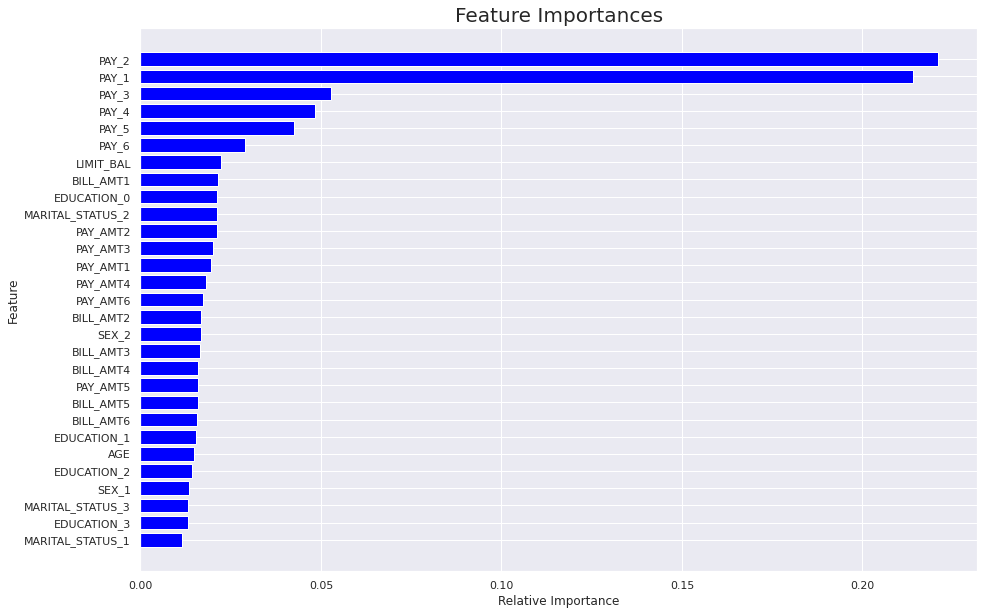

In [ ]:
# Plotting Feature Importance 
features = X_train.columns
importances = xgb_optimalmodel.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')

# <b> Conclusion

---





> * <b> 'PAY_2' AND 'Pay_1' are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.
> * <b> If business demanded a model with high precision score then - Logistic Regression would be best fit model.
> * <b> If business demanded a model with high recall score then - XGBoost Classifier is the best model.
> * <b> Overall Best Performer based on ROC-AUC, Precision, Recall, F1 Score and KS Statistic then - XGBoost Classifier is the best model.

